In [50]:
# data = pd.read_csv('arterial_hypertension.csv')
# data_a.to_csv('arterial_hypertension_new_cols.csv')
# data_a = calc_all_cells(data, func)

# data = pd.read_csv('healthy.csv')
# data_b = calc_all_cells(data, func)
# data_b.to_csv('healthy_new_cols.csv')

# data = pd.read_csv('myocardial_infarction_6mo.csv')
# data_c = calc_all_cells(data, func)
# data_c.to_csv('myocardial_infarction_6mo_new_cols.csv')

# data = pd.read_csv('myocardial_infarction.csv')
# data_d = calc_all_cells(data, func)
# data_d.to_csv('myocardial_infarction_new_cols.csv')

In [63]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_theme(context='talk', style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 18
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
plt.rcParams['font.family'] = 'HSE Slab'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelweight'] =  'bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 25
plt.rc('axes', unicode_minus=False)


cols = [
        "stand_rrg_sdnn",
        "stand_rrg_rmssd",
        "stand_rrg_nn50",
        "stand_rrg_pnn50",
        "lying_rrg_sdnn",
        "lying_rrg_rmssd",
        "lying_rrg_nn50",
        "lying_rrg_pnn50",
        "d_sdnn",
        "d_rmssd",
        "d_nn50",
        "d_pnn50"
    ]


In [64]:
def func(lst, metr):
    if isinstance(lst, float):
        return None
    series = pd.Series(ast.literal_eval(lst))
    if metr == "sdnn":
        return series.std()
    elif metr == "rmssd":
        return np.sqrt(np.mean(series.diff() ** 2))
    elif metr == "nn50":
        return np.sum(series.diff().abs() > 0.05)
    elif metr == "pnn50":
        return (np.sum(series.diff().abs() > 0.05)) / (len(series) - 1) * 100
    else:
        return None


def calc_all_cells(data, func):
    metr = ["sdnn", "rmssd", "nn50", "pnn50"]
    typ = ["stand_rrg", "lying_rrg", "stand_rrn", "lying_rrn"]
    for i in typ:
        for j in metr:
            data[i + "_" + j] = data[i].map(lambda x: func(x, j))
    return data


def dif_stand_lying(data, cols):
    return (data[cols[0]] - data[cols[1]]).abs()


def calc_median_cols(data):
    return [data[i].median() if not data[i].isna().all() else np.nan for i in cols]


def make_kde(datas, labels, col):
    for da, la in zip(datas, labels):
        sns.kdeplot(da[col], label=la, warn_singular=False)
    plt.legend()
    plt.show()

In [65]:
ahnc = pd.read_csv("arterial_hypertension_new_cols.csv")
mi6nc = pd.read_csv("myocardial_infarction_6mo_new_cols.csv")
minc = pd.read_csv("myocardial_infarction_new_cols.csv")
hnc = pd.read_csv("healthy_new_cols.csv")

In [66]:
for i in [ahnc, mi6nc, minc, hnc]:
    for j in [['stand_rrg_sdnn', 'lying_rrg_sdnn', 'd_sdnn'], 
              ['stand_rrg_rmssd', 'lying_rrg_rmssd', 'd_rmssd'], 
              ['stand_rrg_nn50', 'lying_rrg_nn50', 'd_nn50'], 
              ['stand_rrg_pnn50', 'lying_rrg_pnn50', 'd_pnn50']]:
        i[j[2]] = dif_stand_lying(i, j)

In [67]:
median_df = pd.DataFrame(
    {
        "ahnc": calc_median_cols(ahnc),
        "mi6nc": calc_median_cols(mi6nc),
        "minc": calc_median_cols(minc),
        "hnc": calc_median_cols(hnc),
    },
    index=cols,
)
median_df

,ahnc,mi6nc,minc,hnc
stand_rrg_sdnn,0.043639,0.031103,NaN,0.047793
stand_rrg_rmssd,0.029463,0.030292,NaN,0.026852
stand_rrg_nn50,21.000000,16.500000,NaN,21.000000
stand_rrg_pnn50,2.376426,2.339064,NaN,1.879045
lying_rrg_sdnn,0.047744,0.036520,0.046748,0.059942
lying_rrg_rmssd,0.043502,0.040789,0.053902,0.050033
lying_rrg_nn50,61.000000,28.000000,51.000000,111.000000
lying_rrg_pnn50,8.393638,3.645833,7.115629,12.964931
d_sdnn,0.010622,0.007231,NaN,0.017829
d_rmssd,0.018017,0.013972,NaN,0.013424


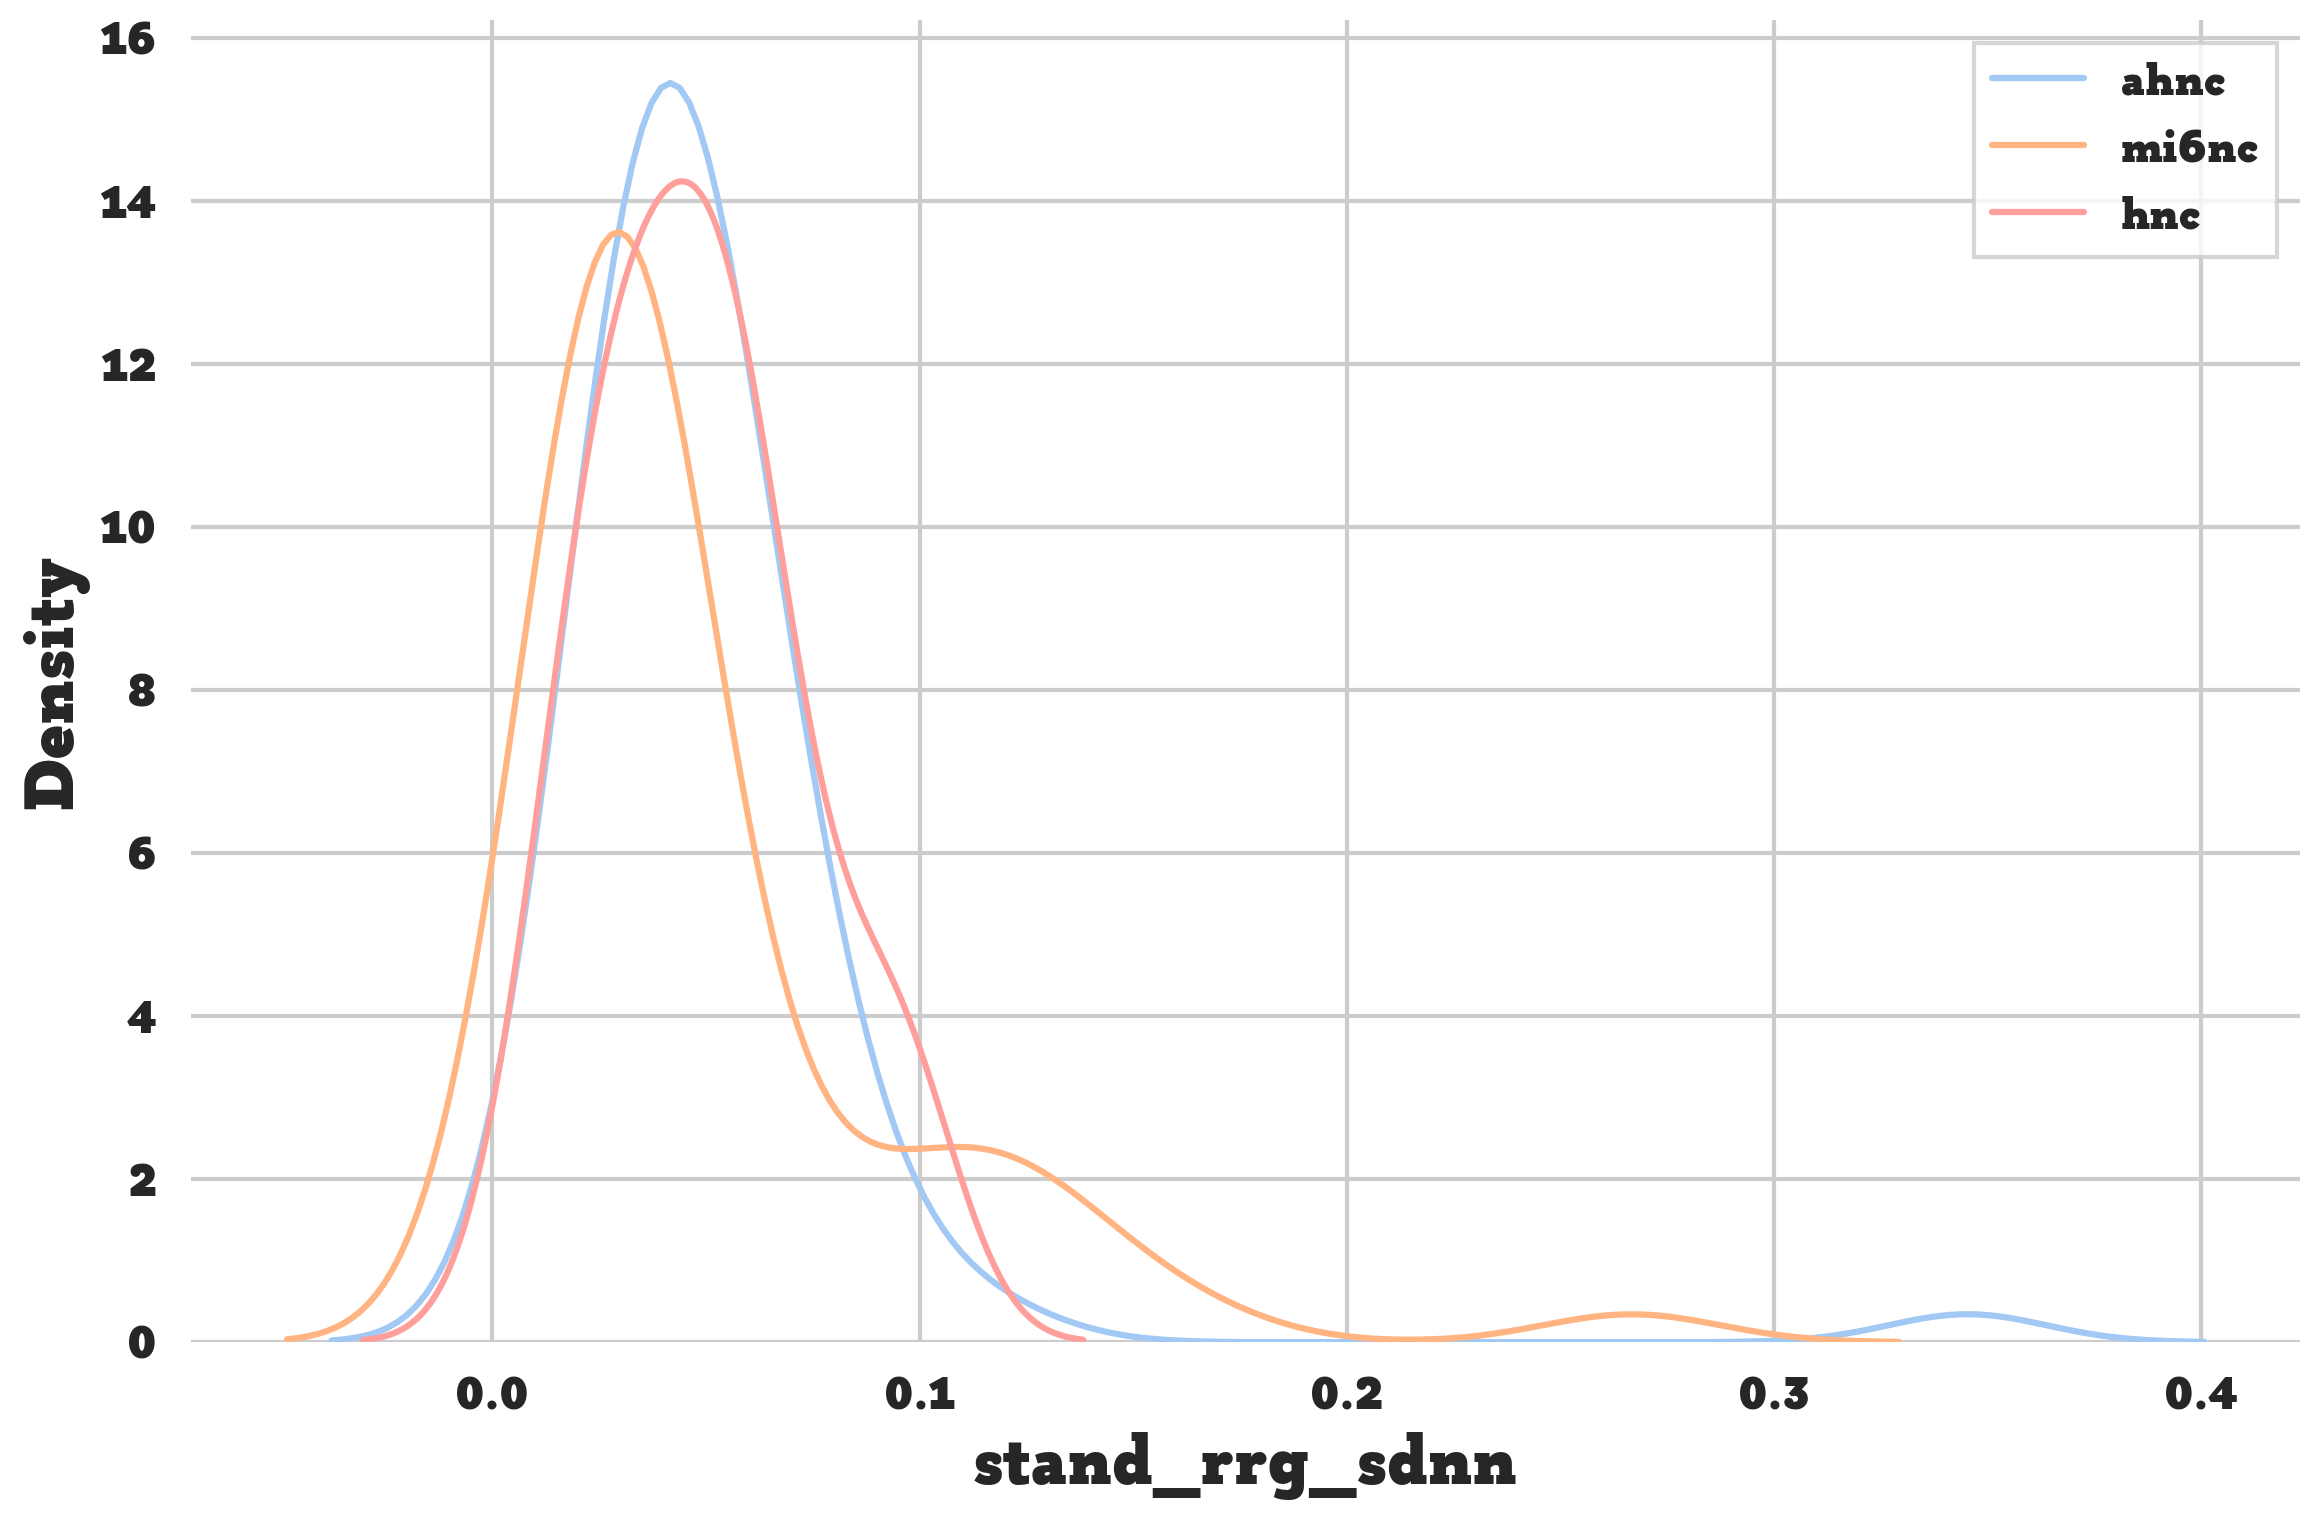

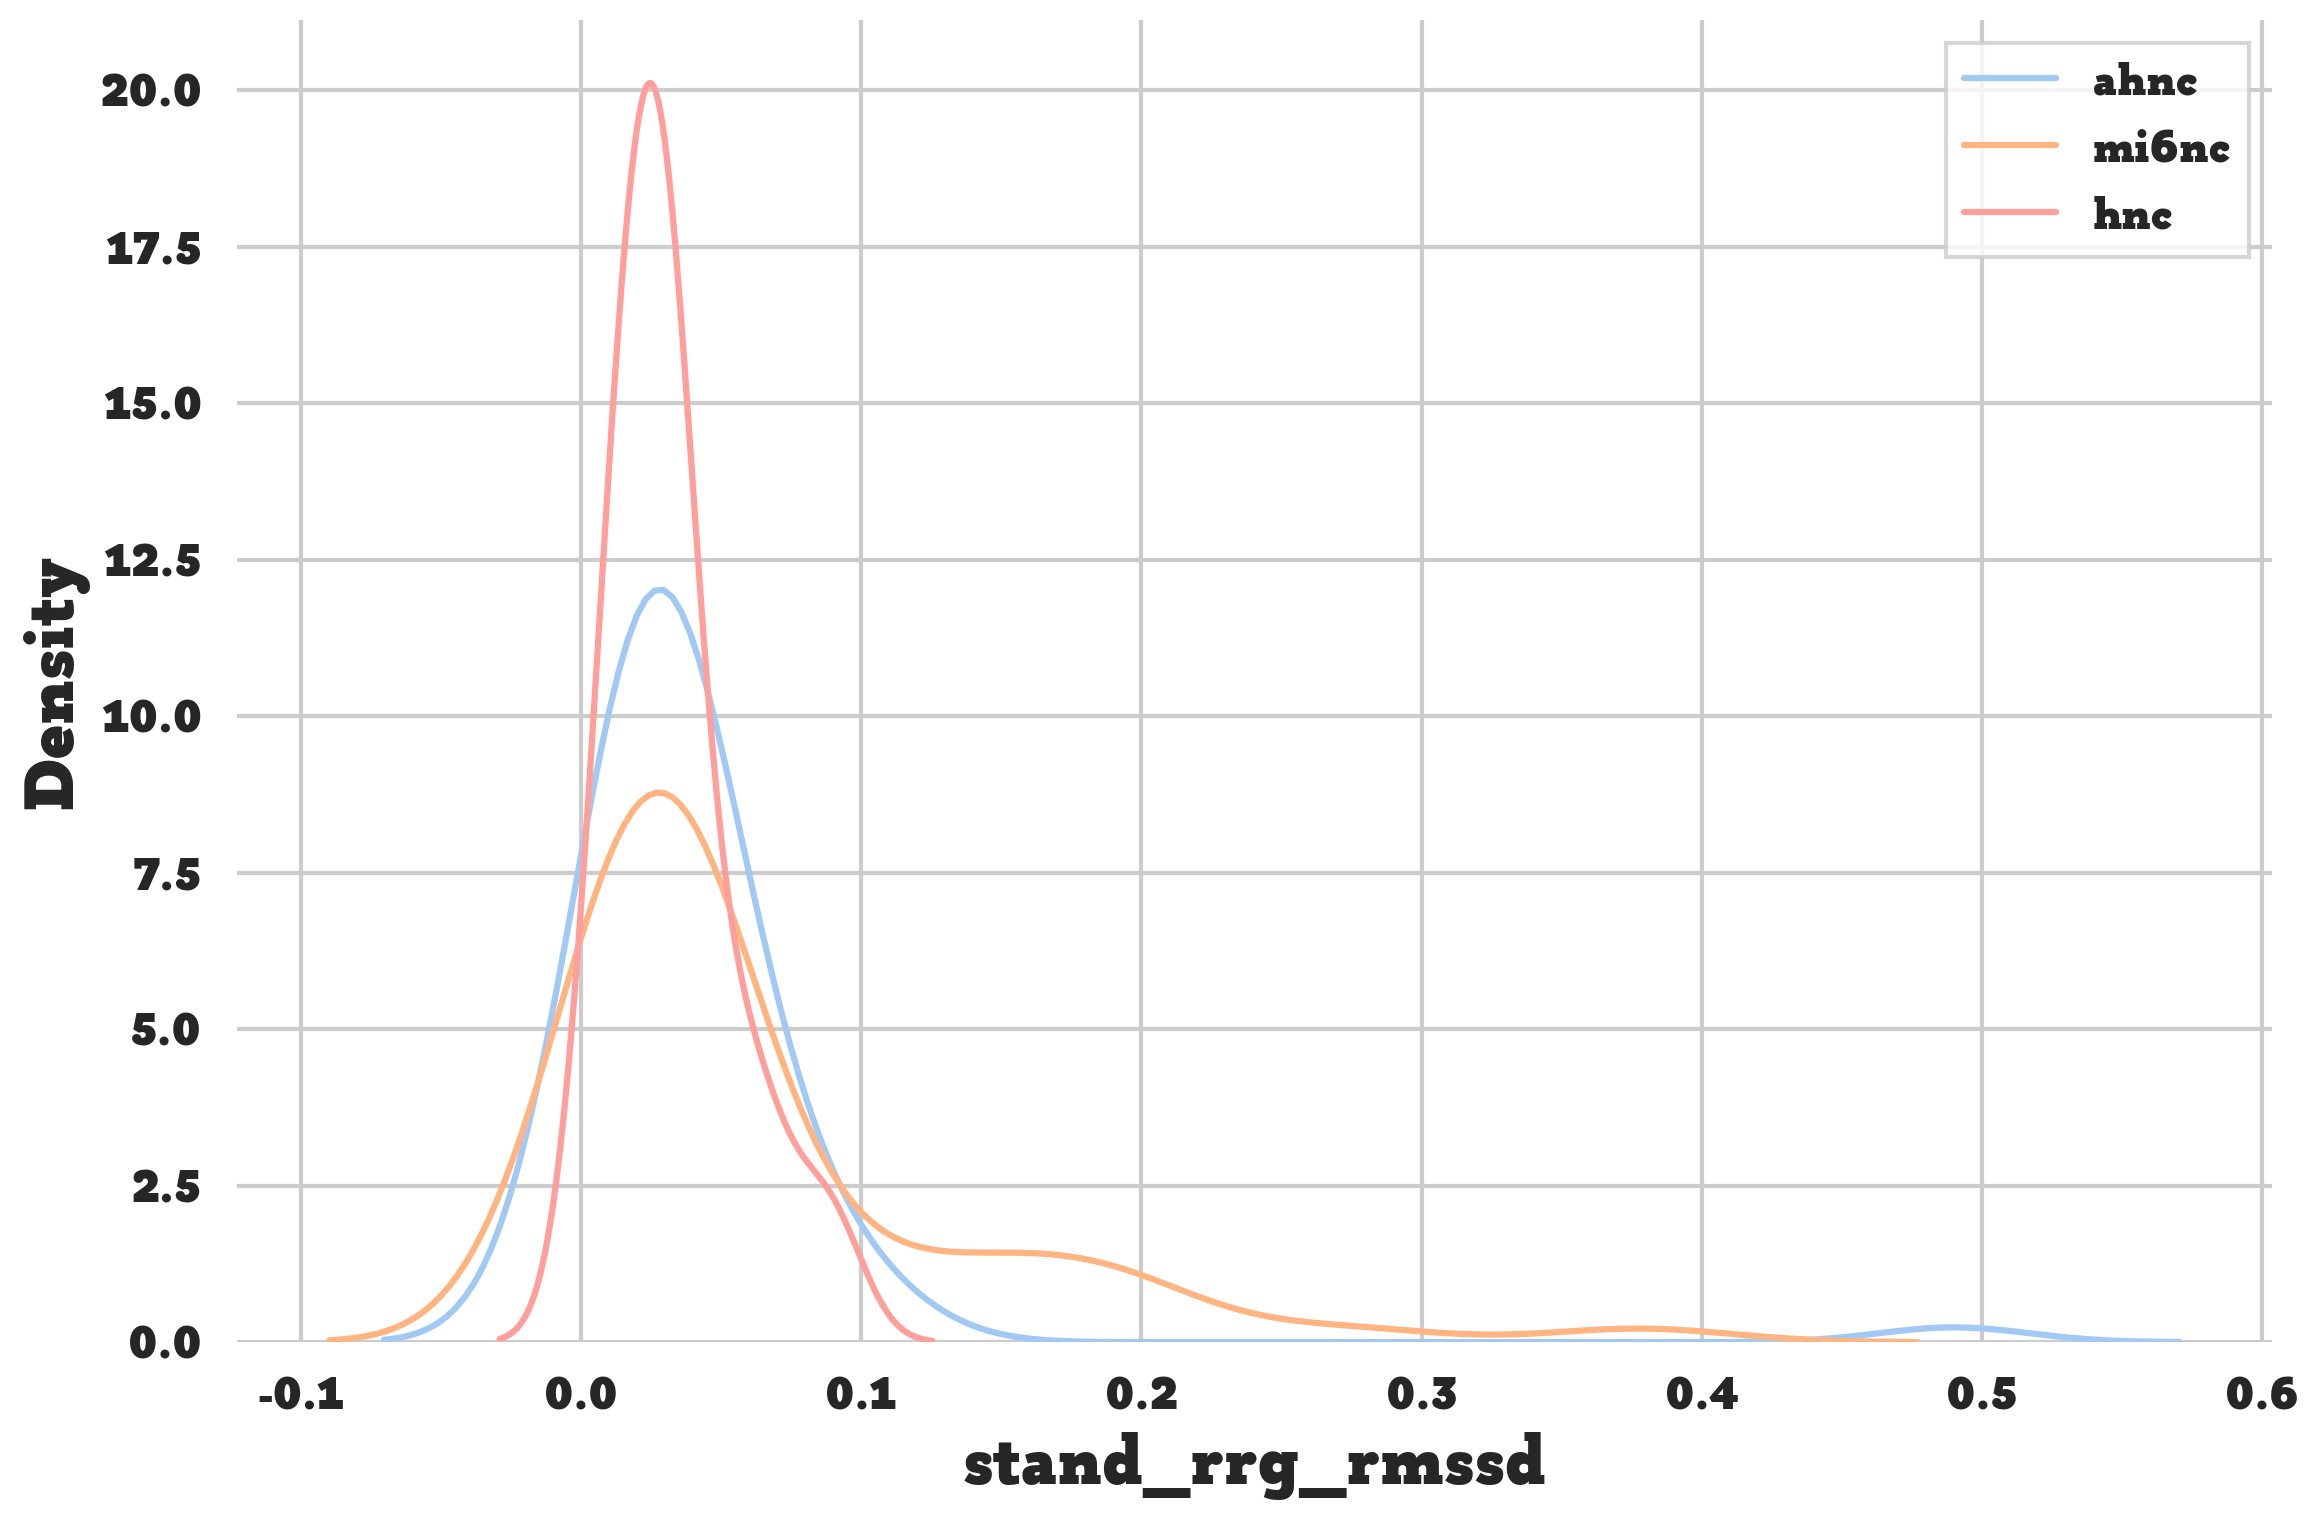

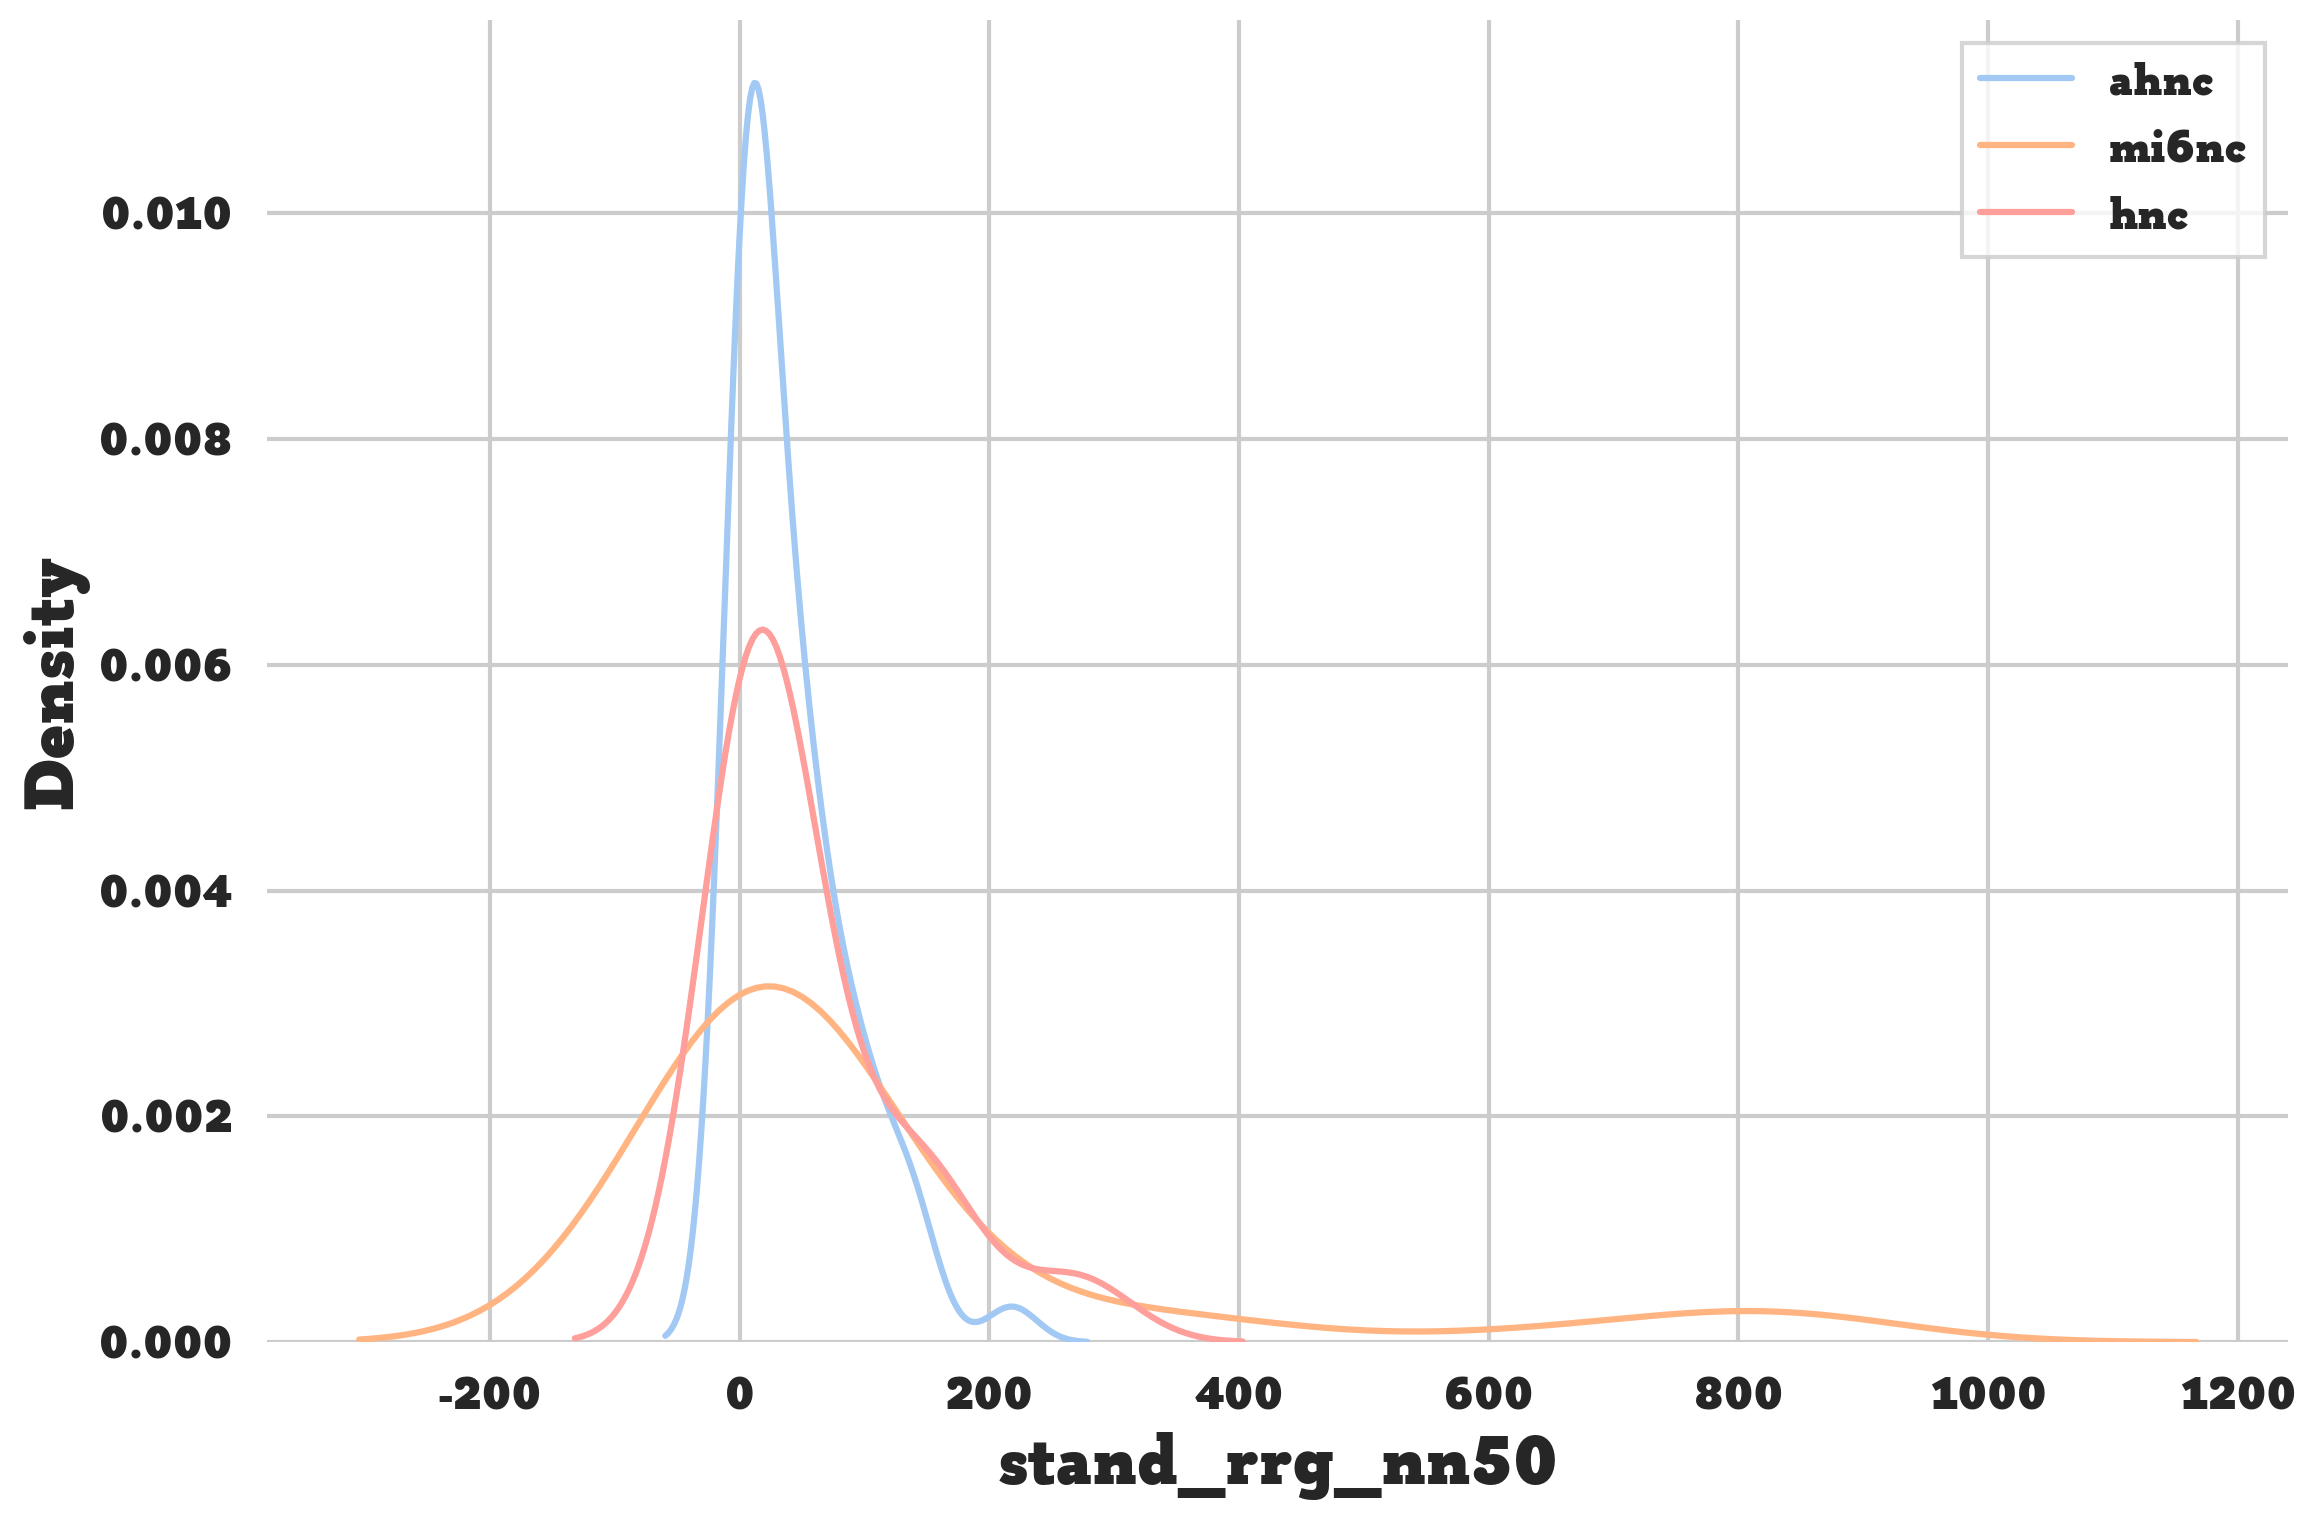

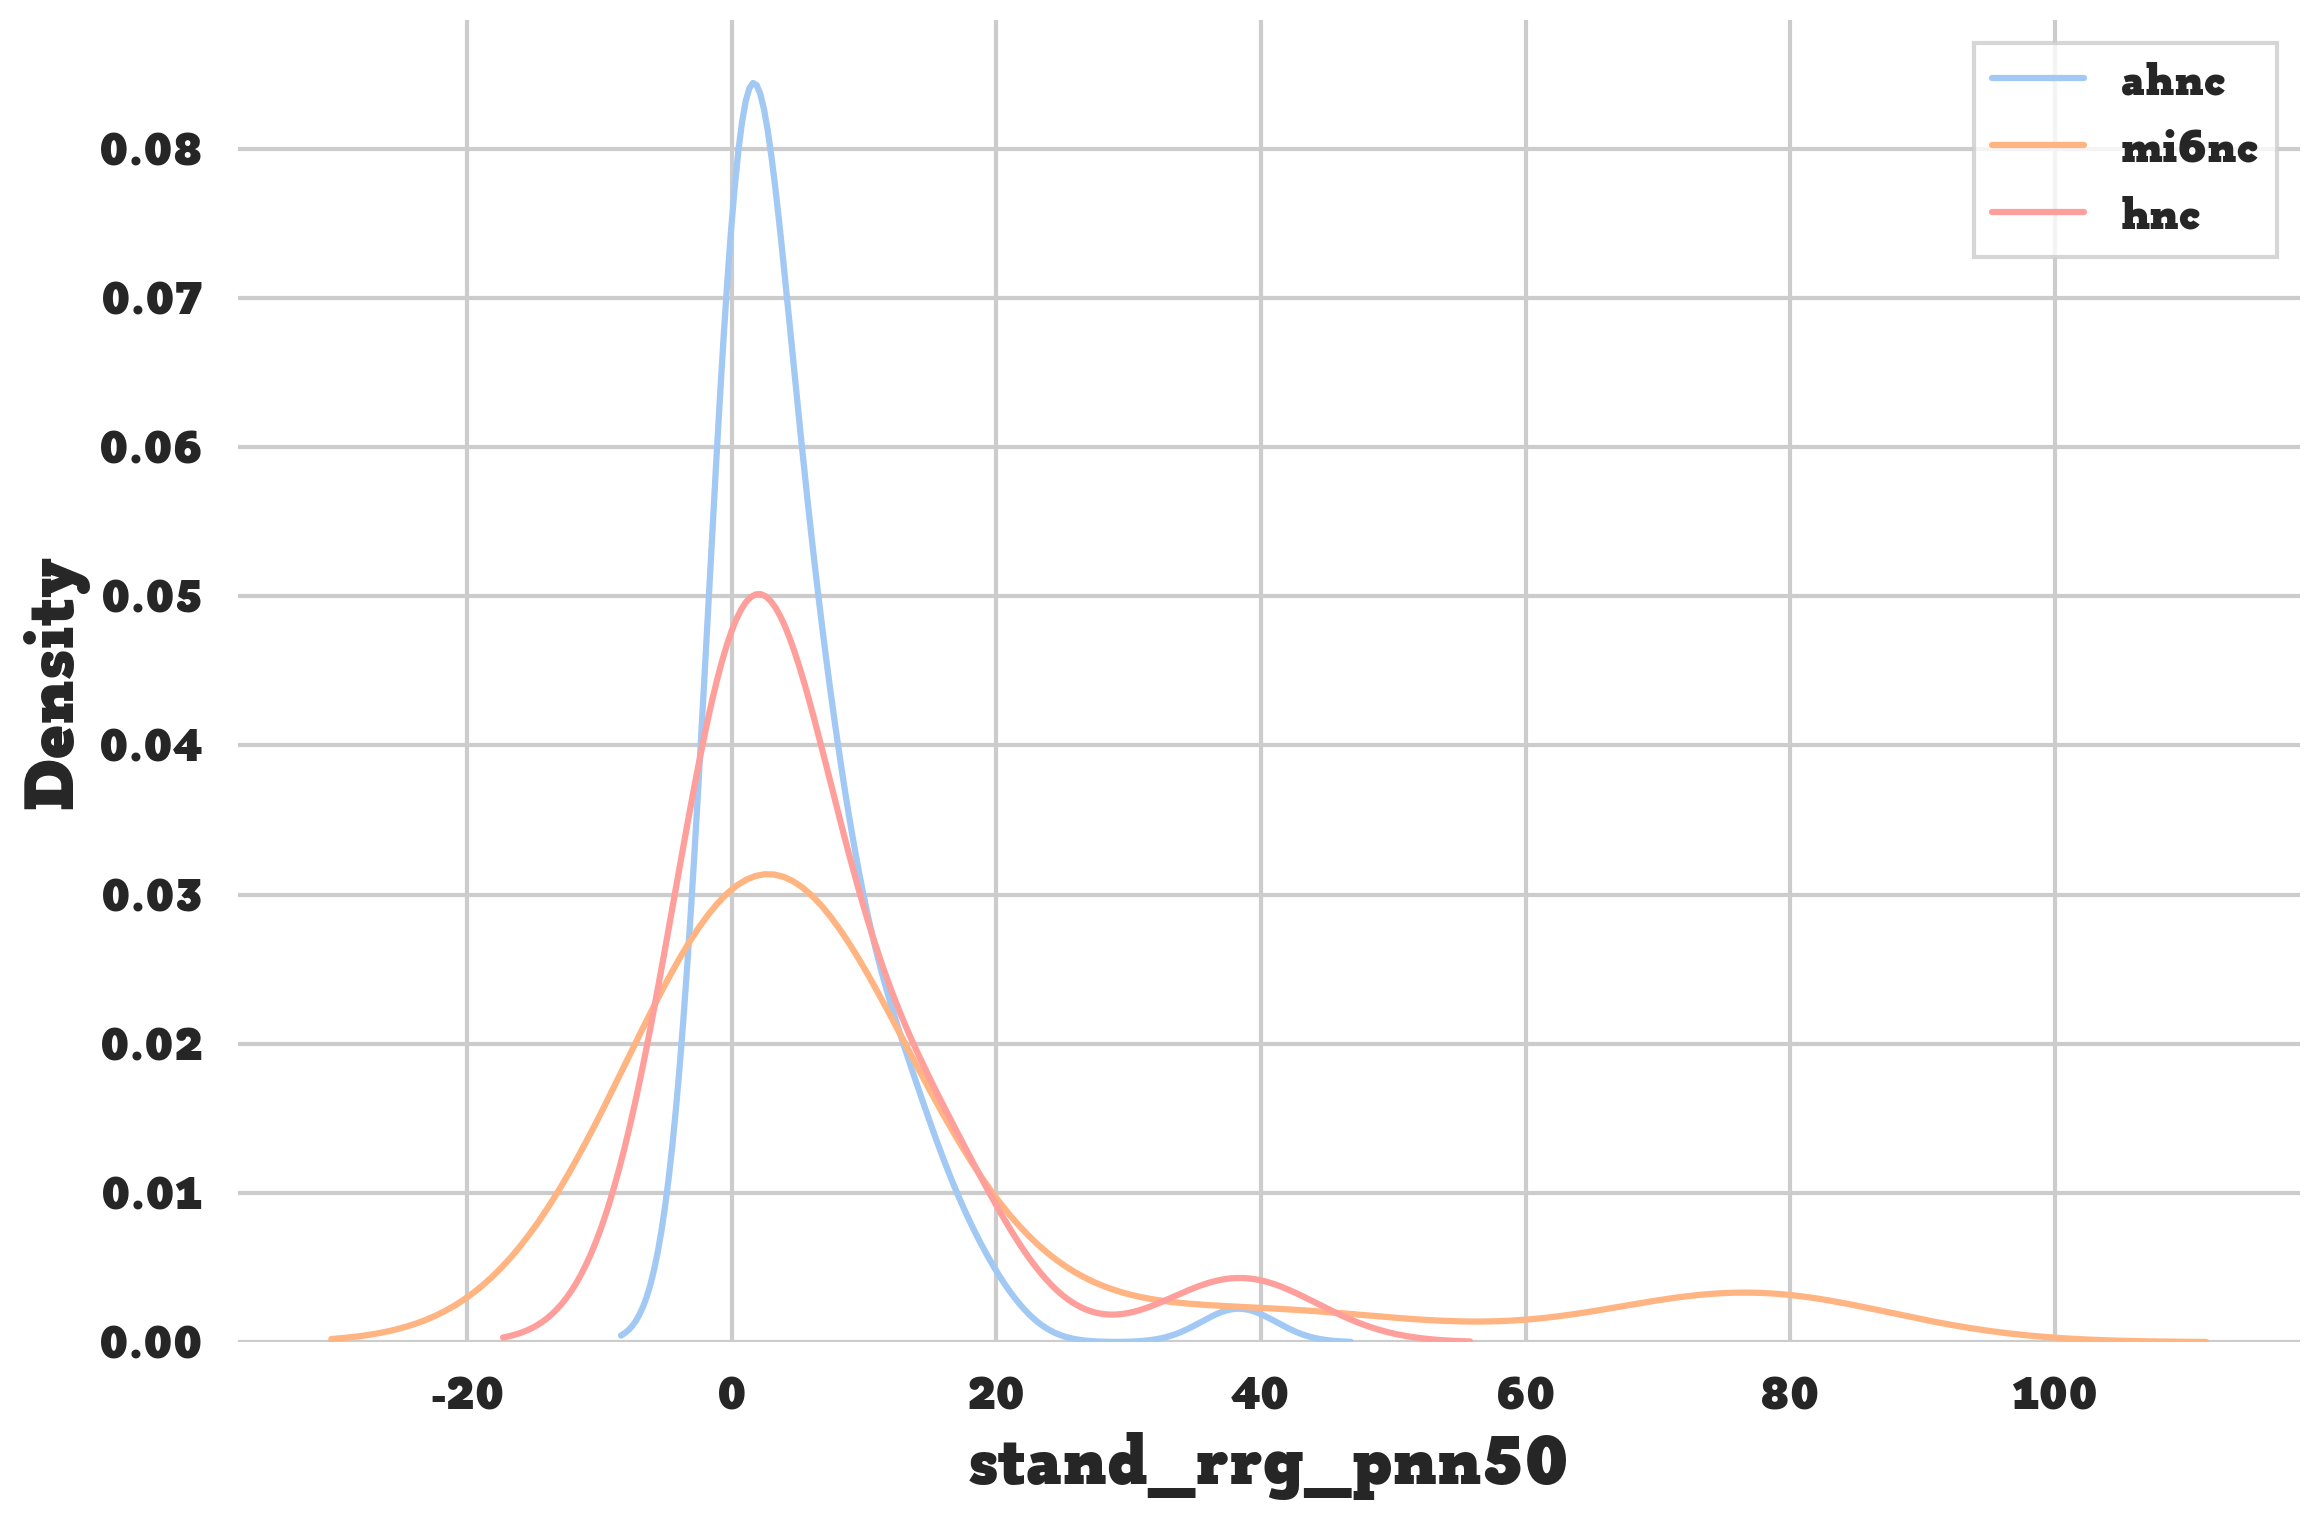

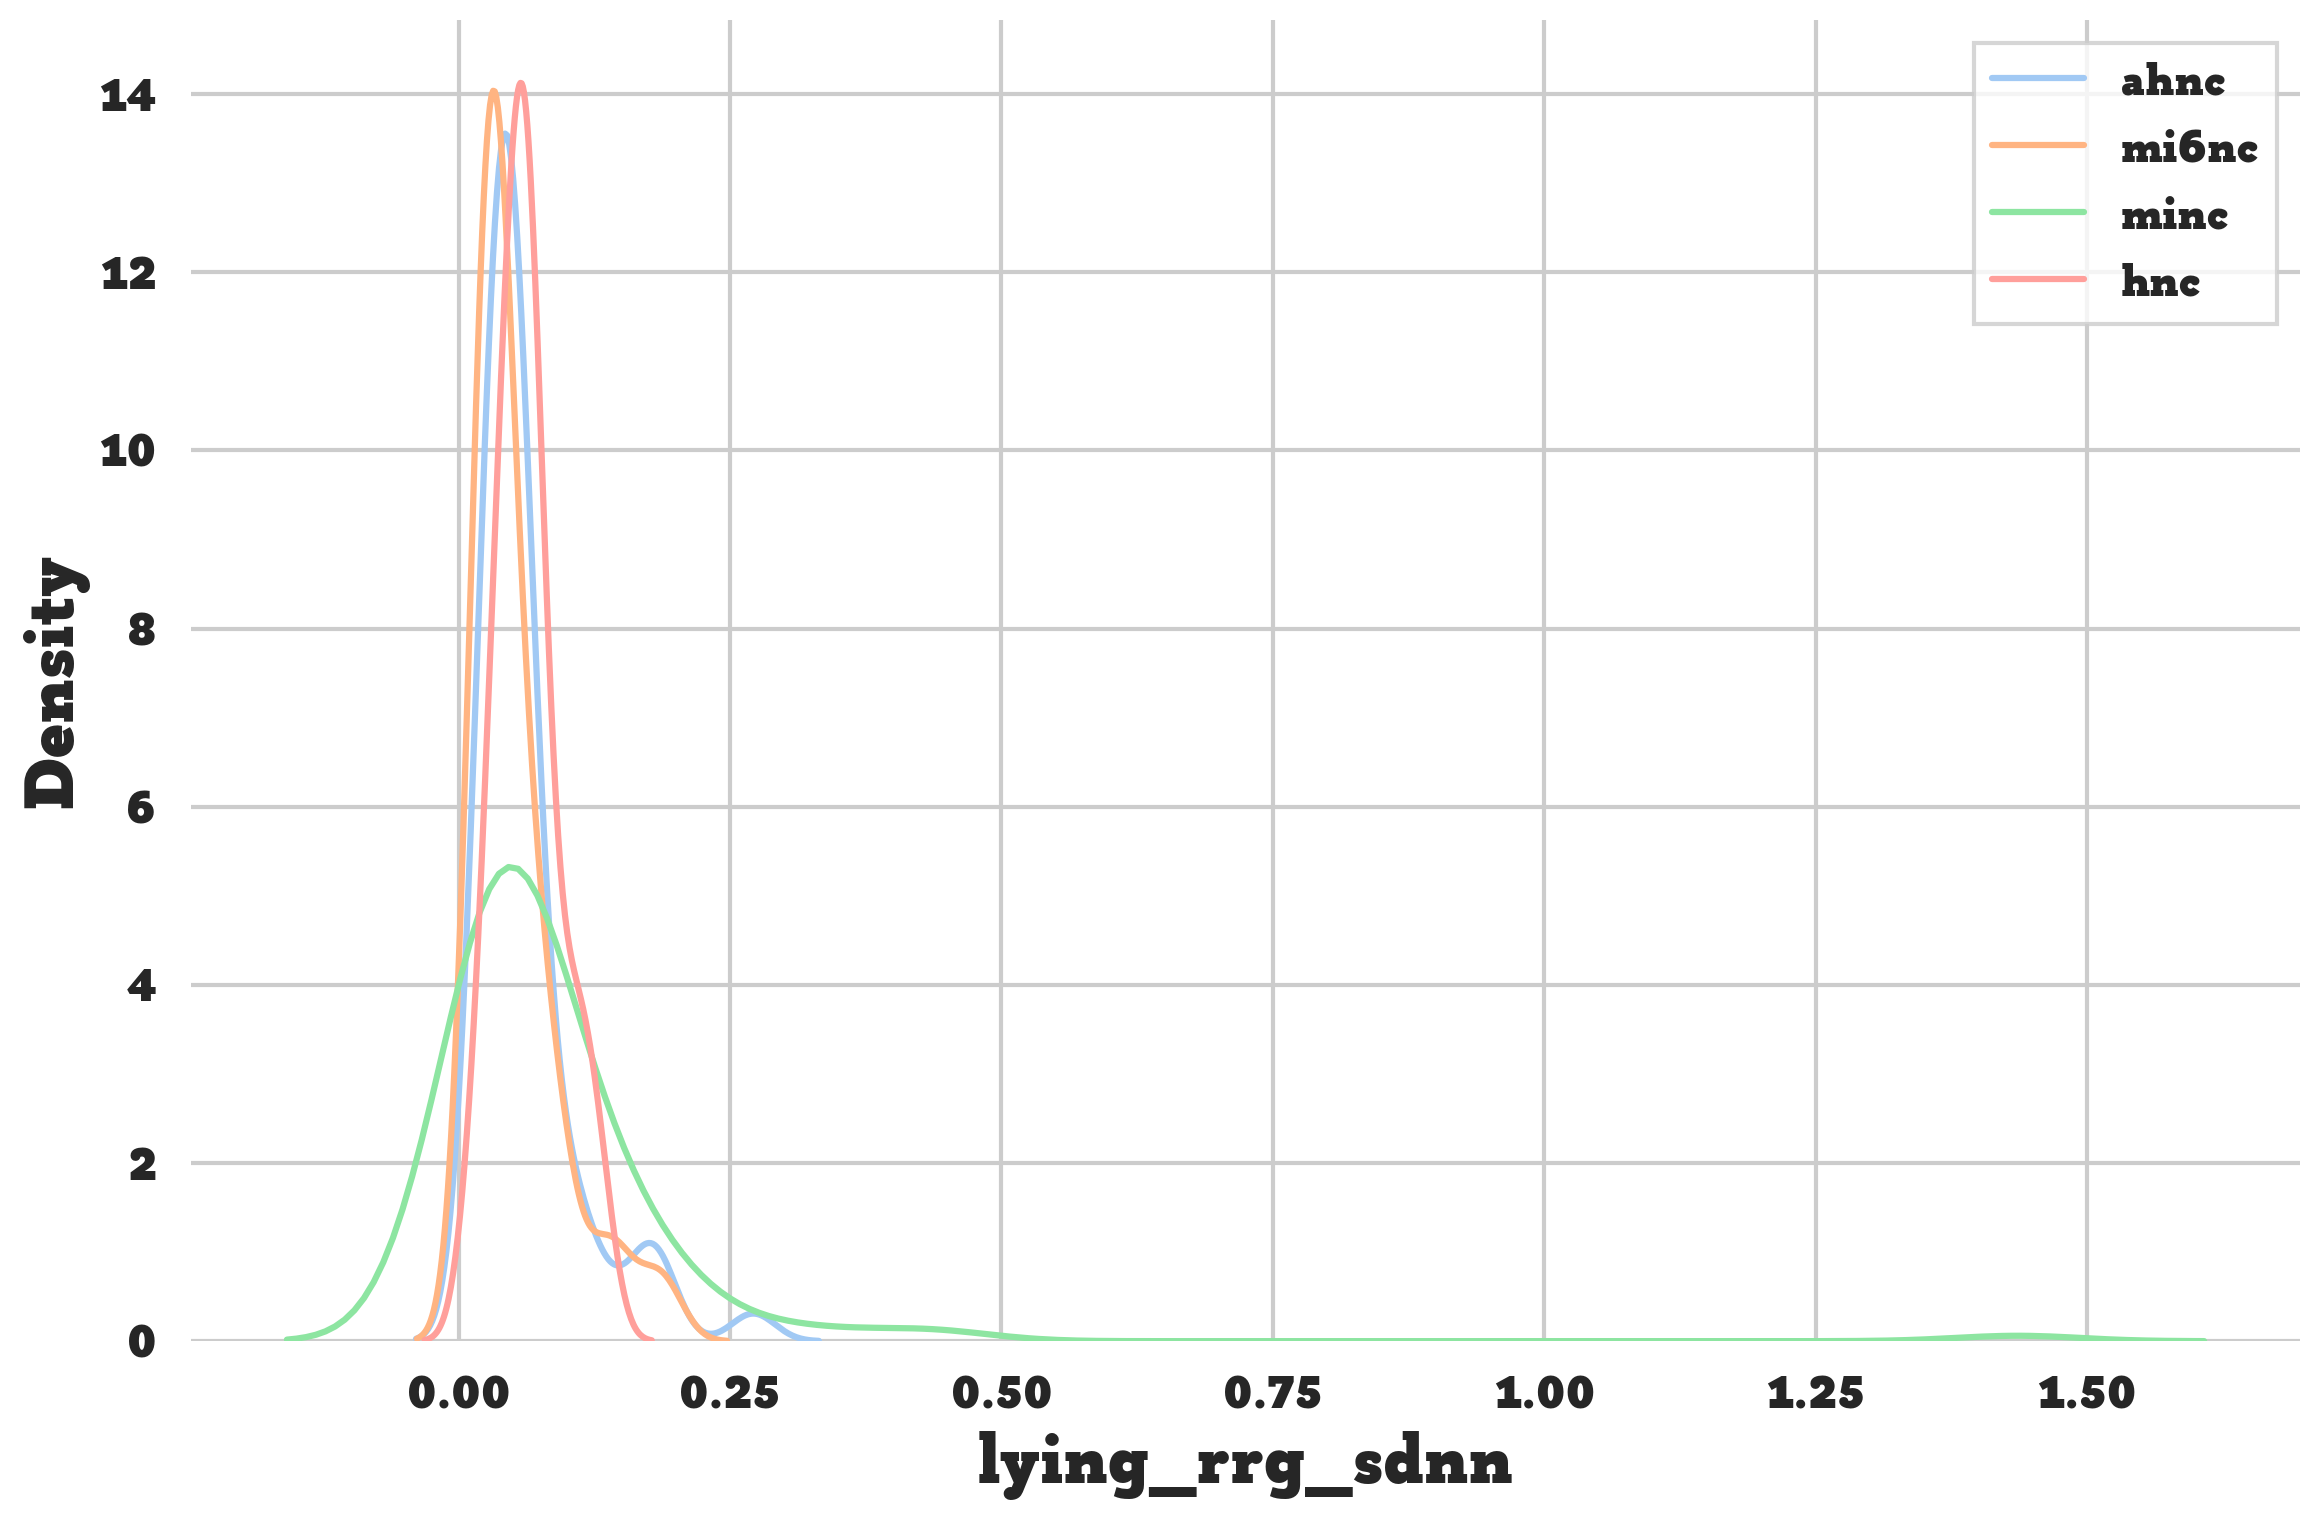

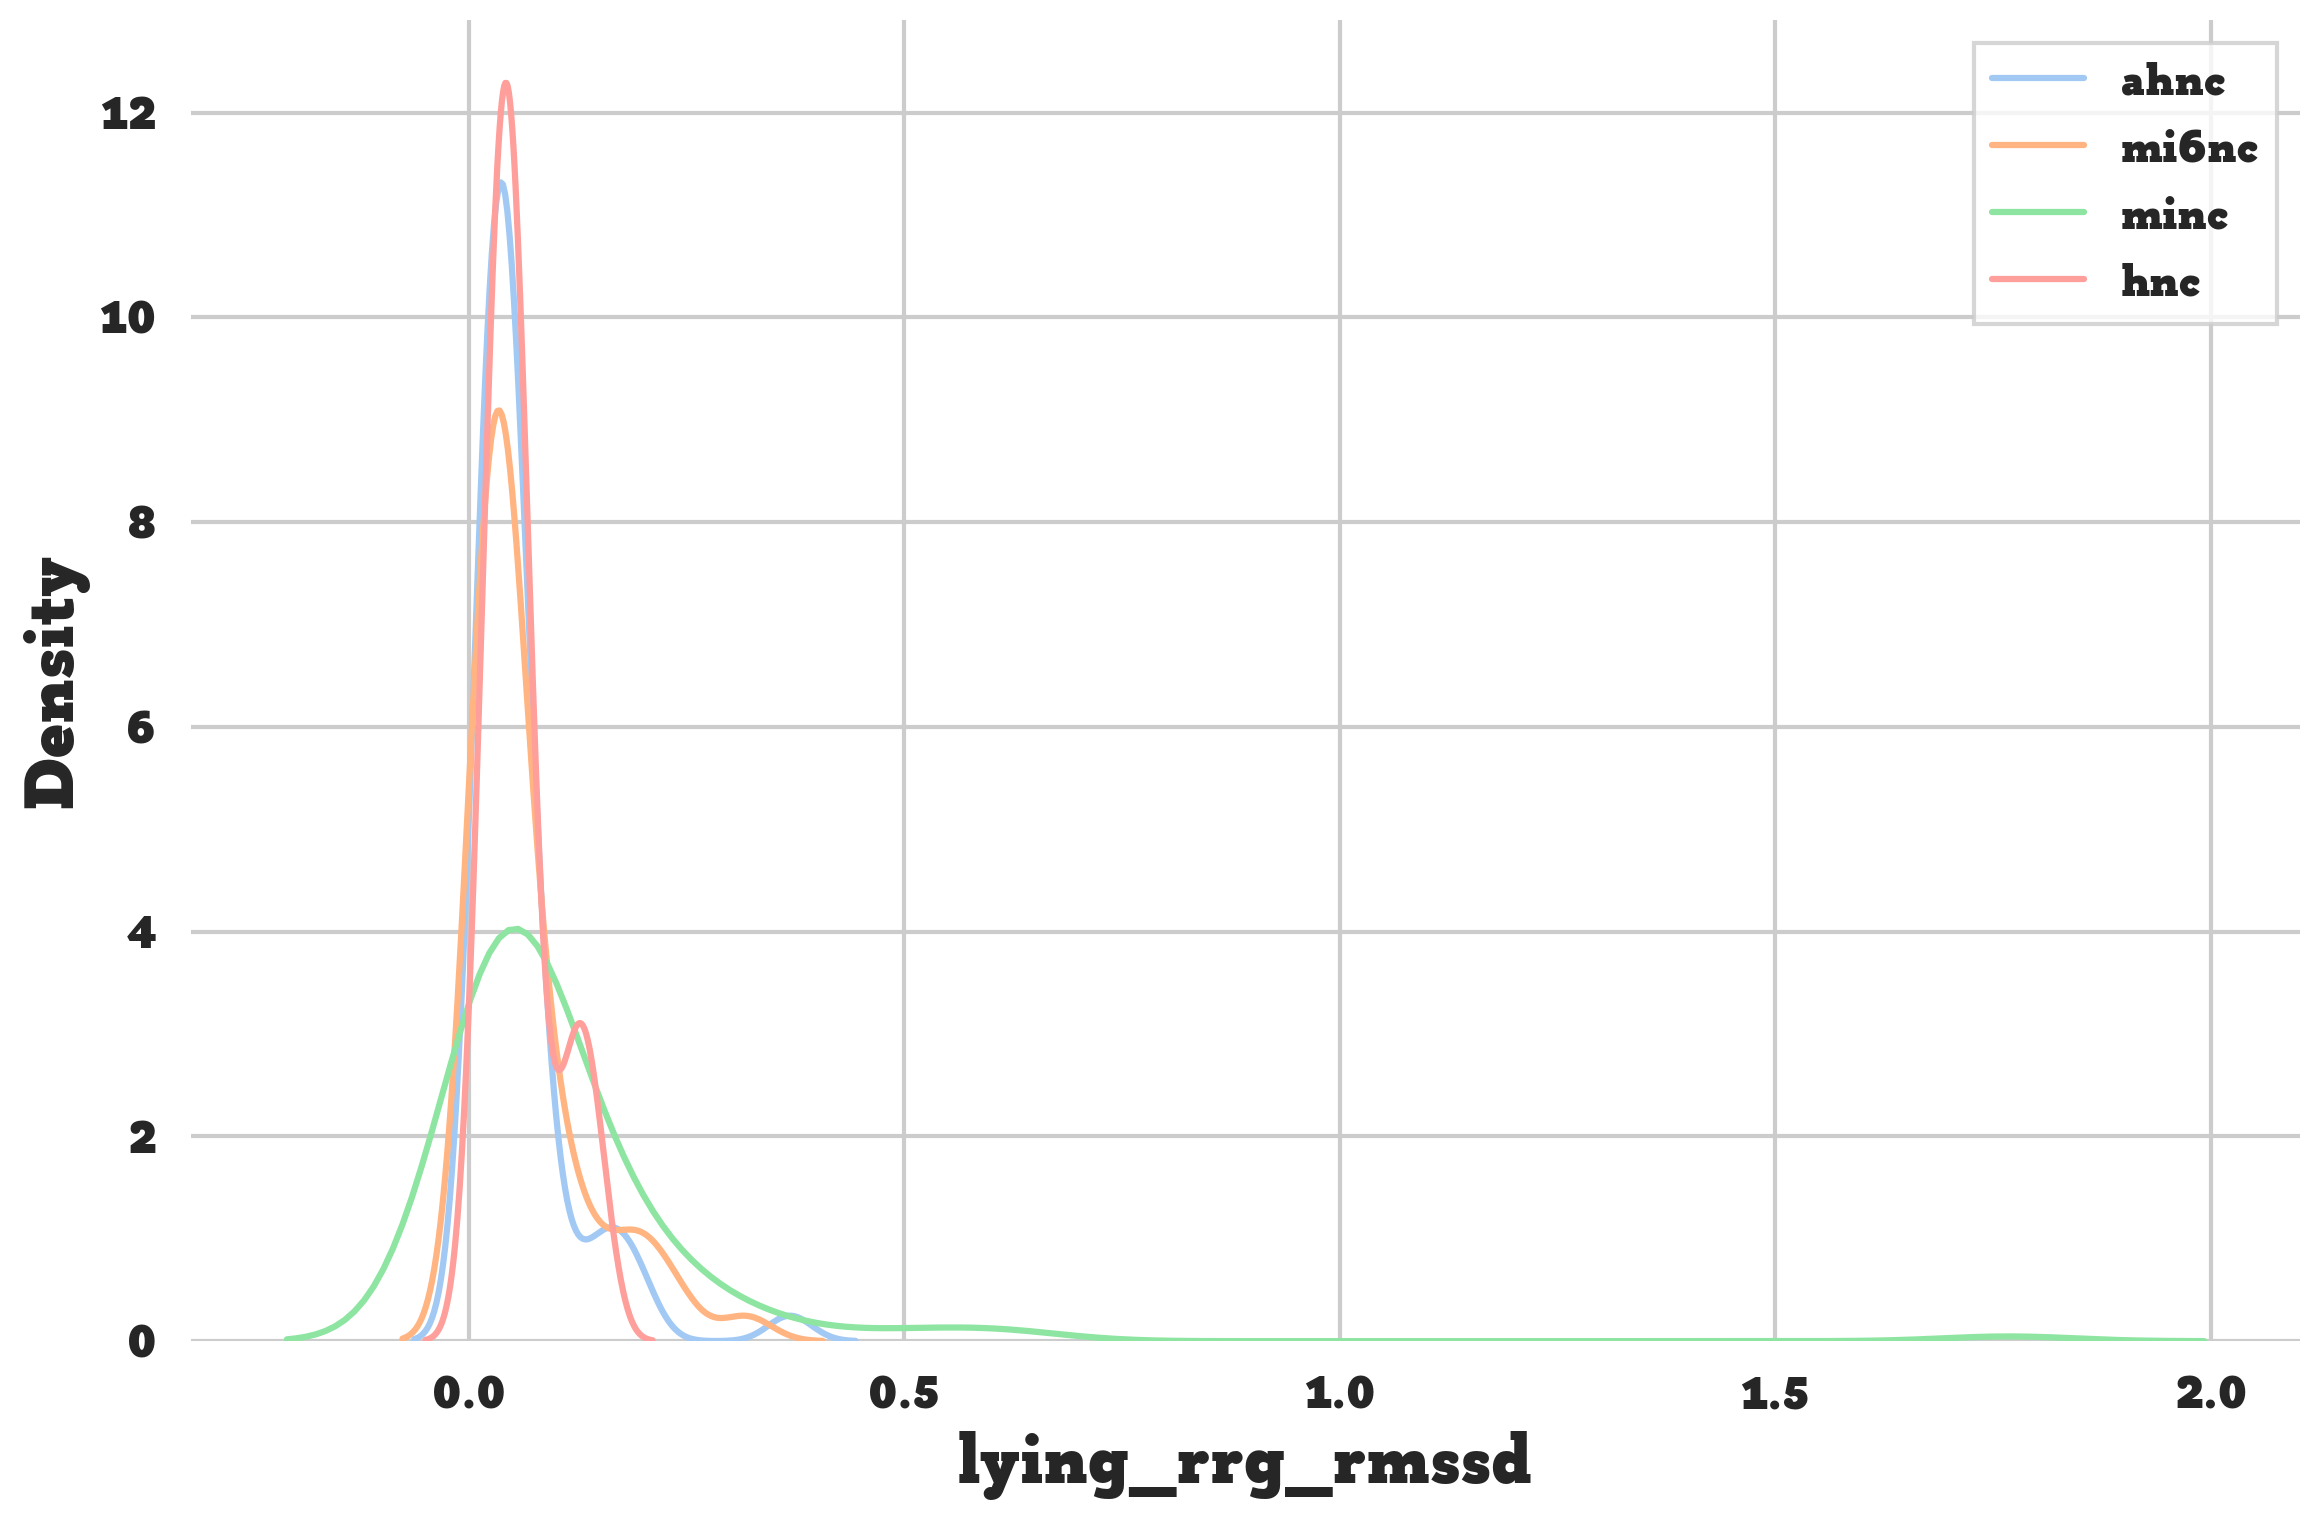

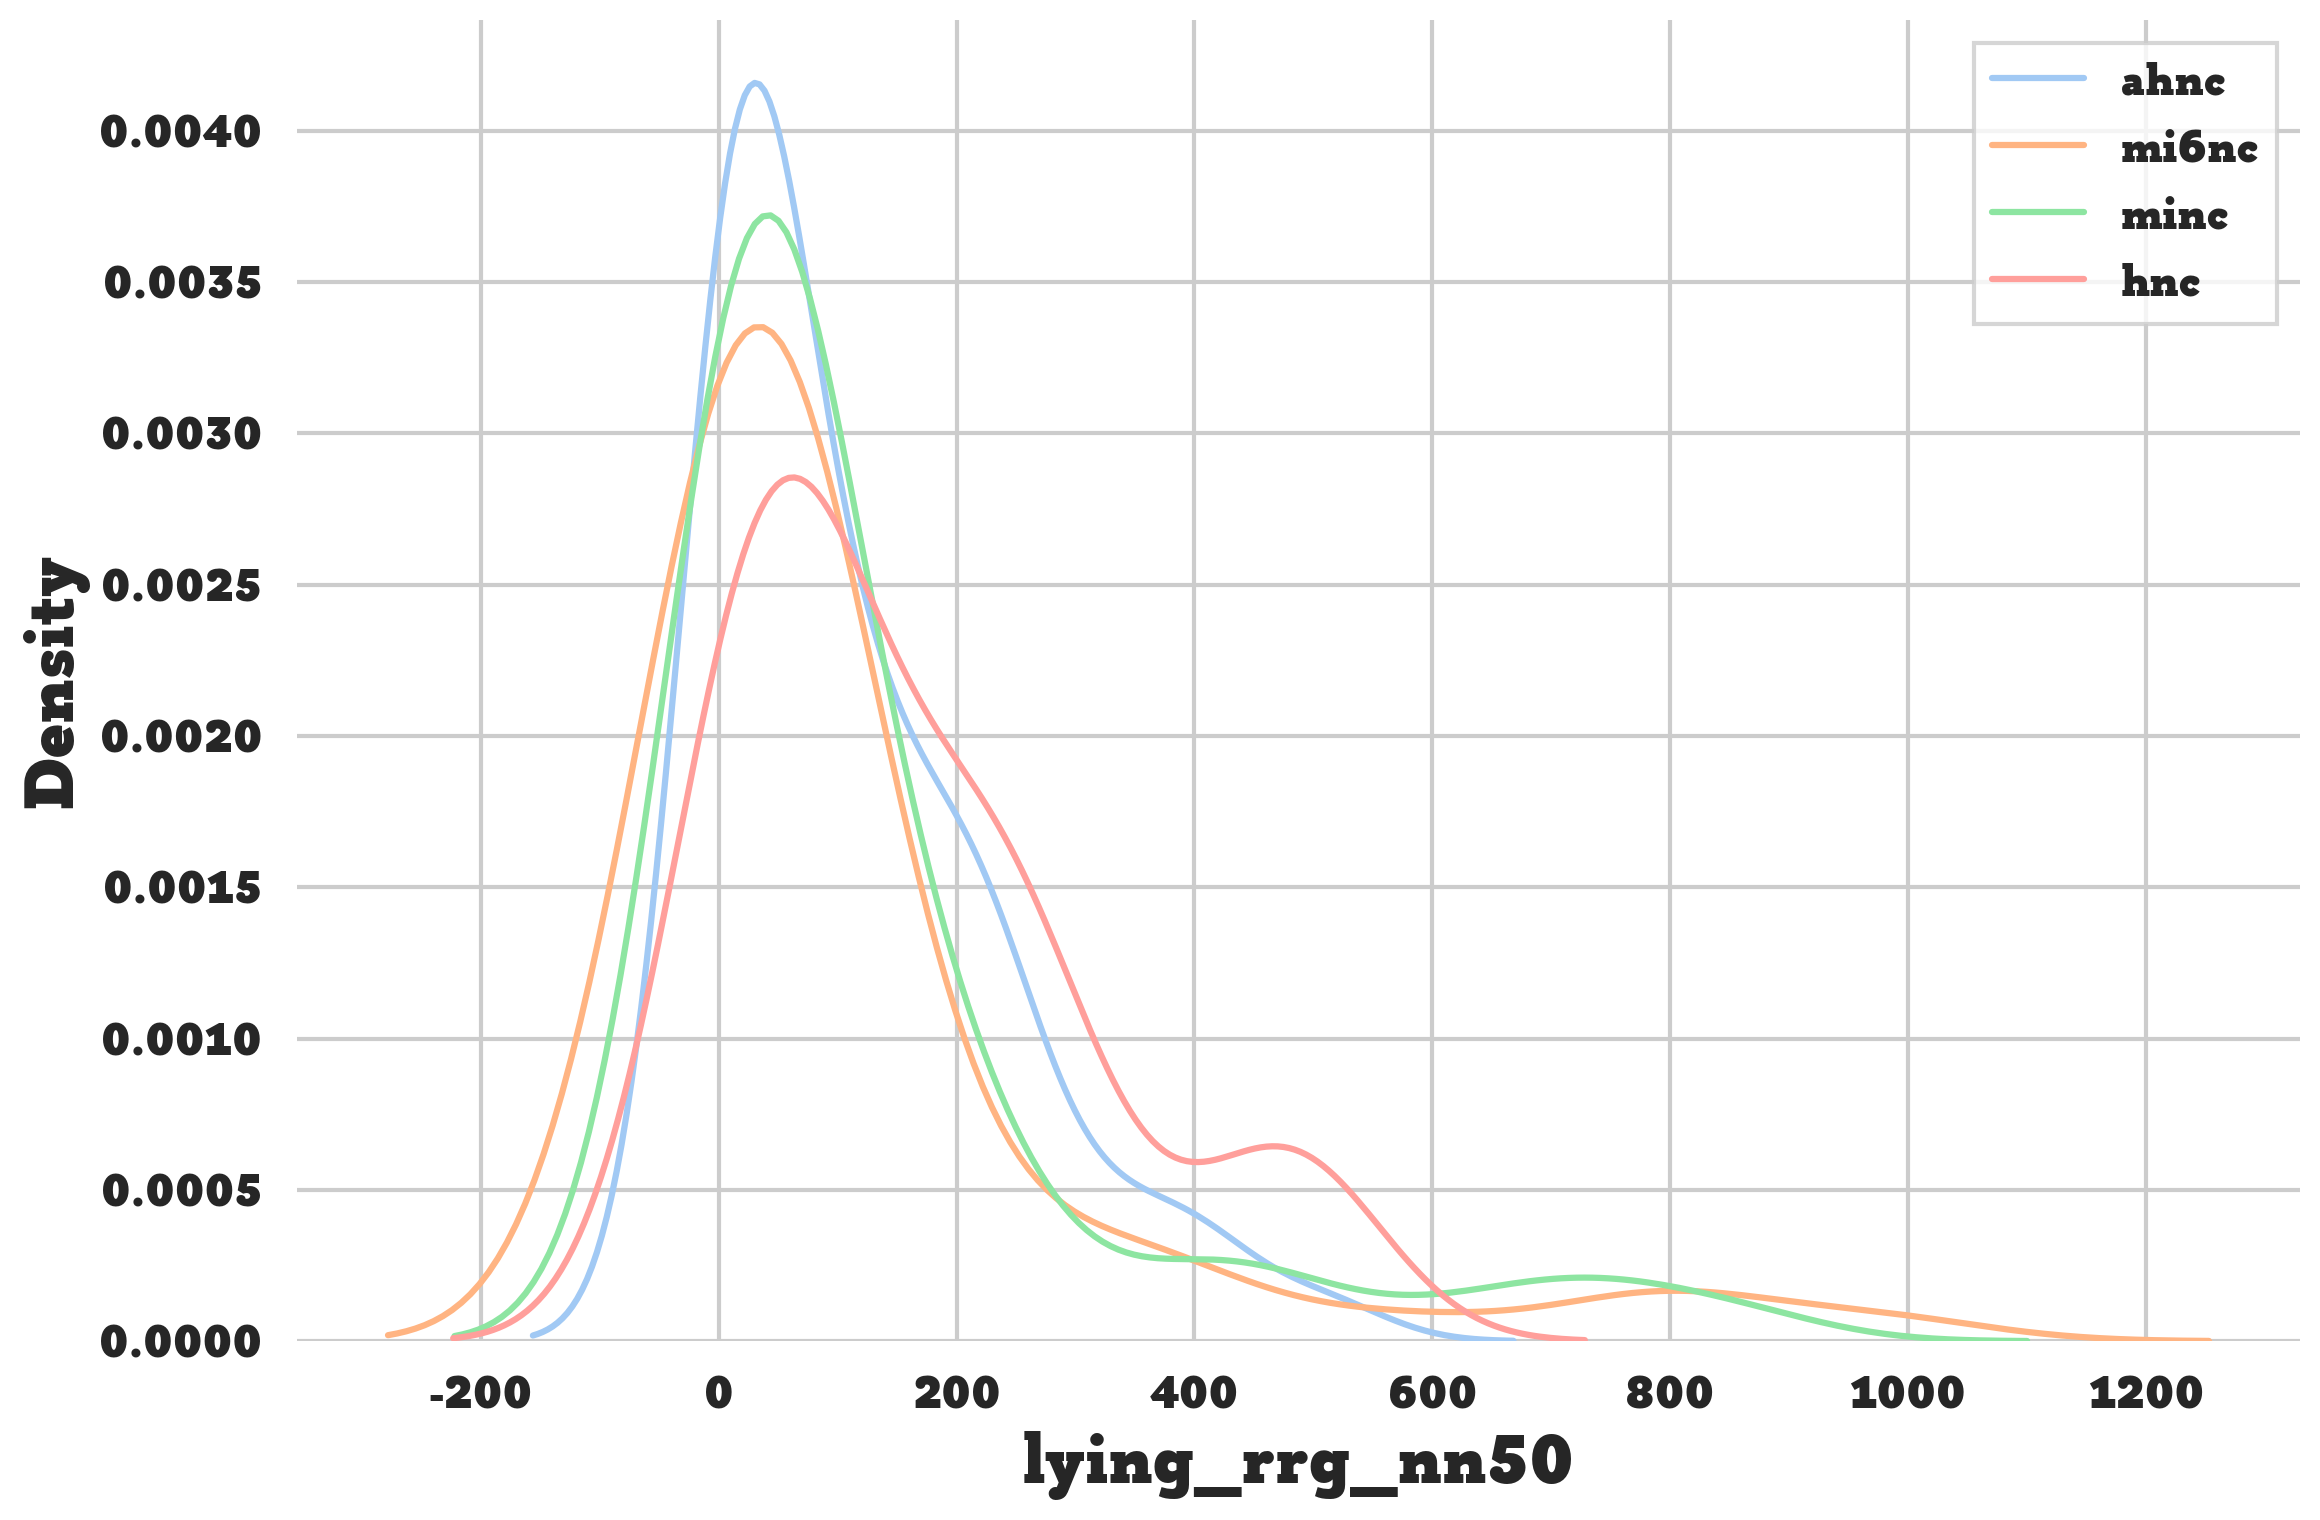

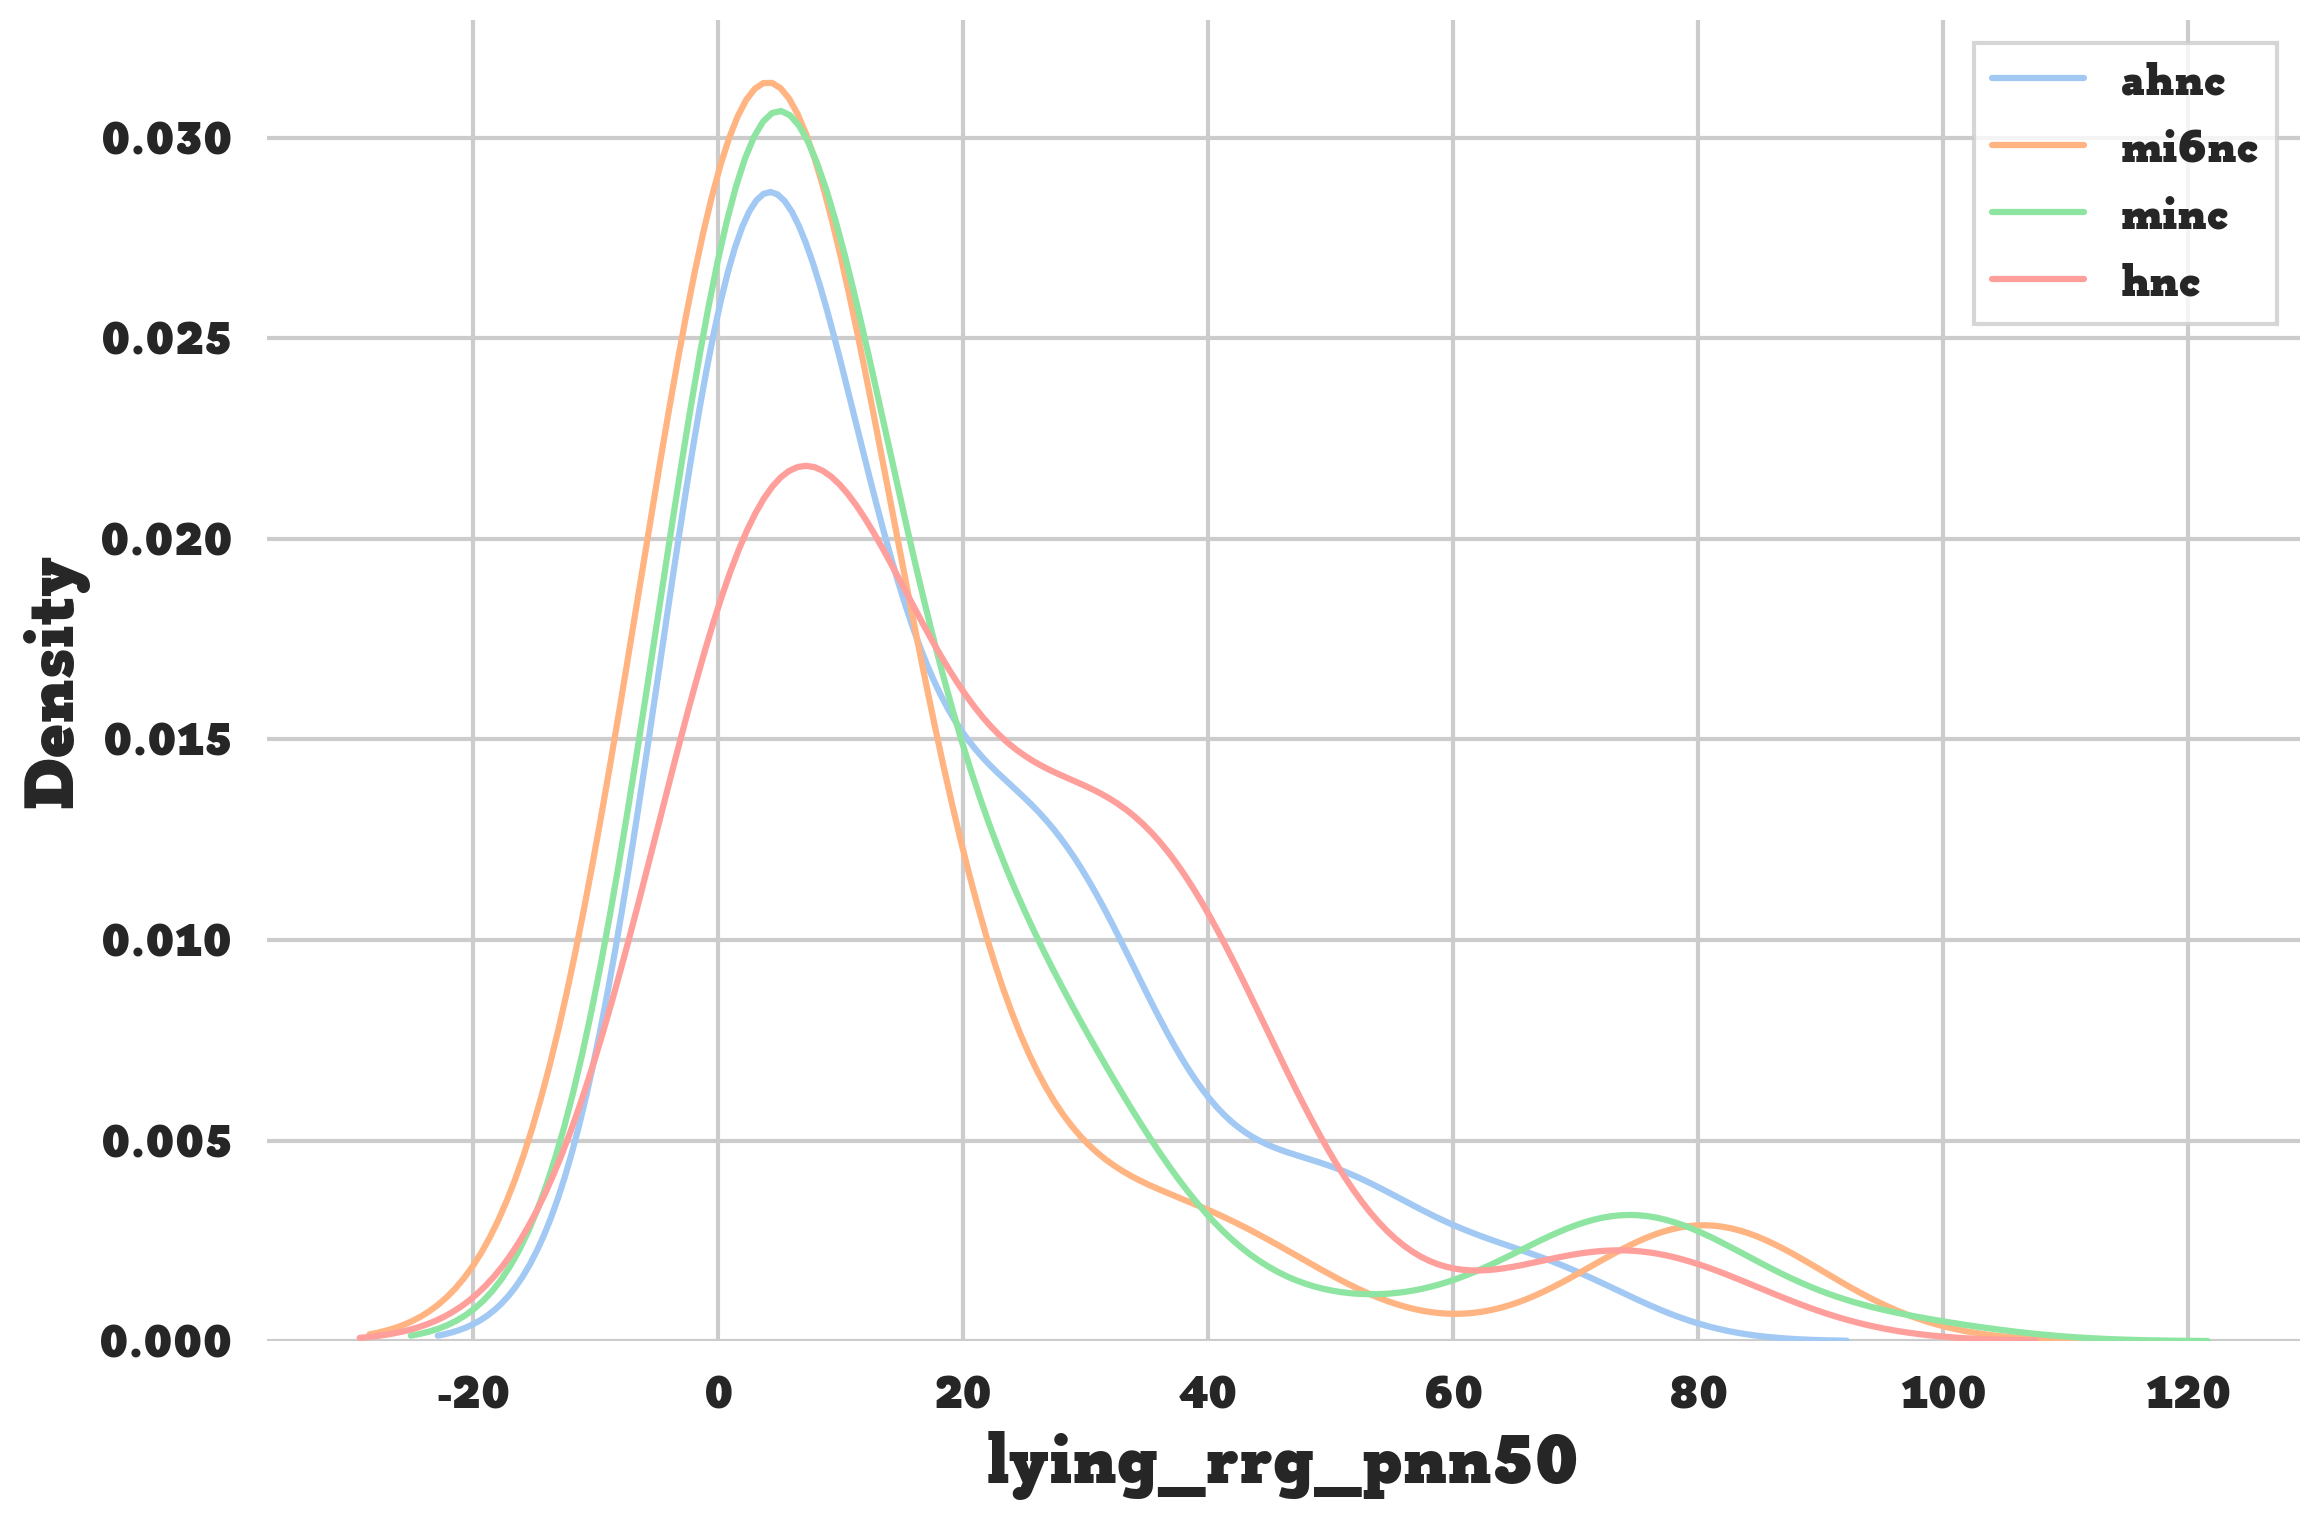

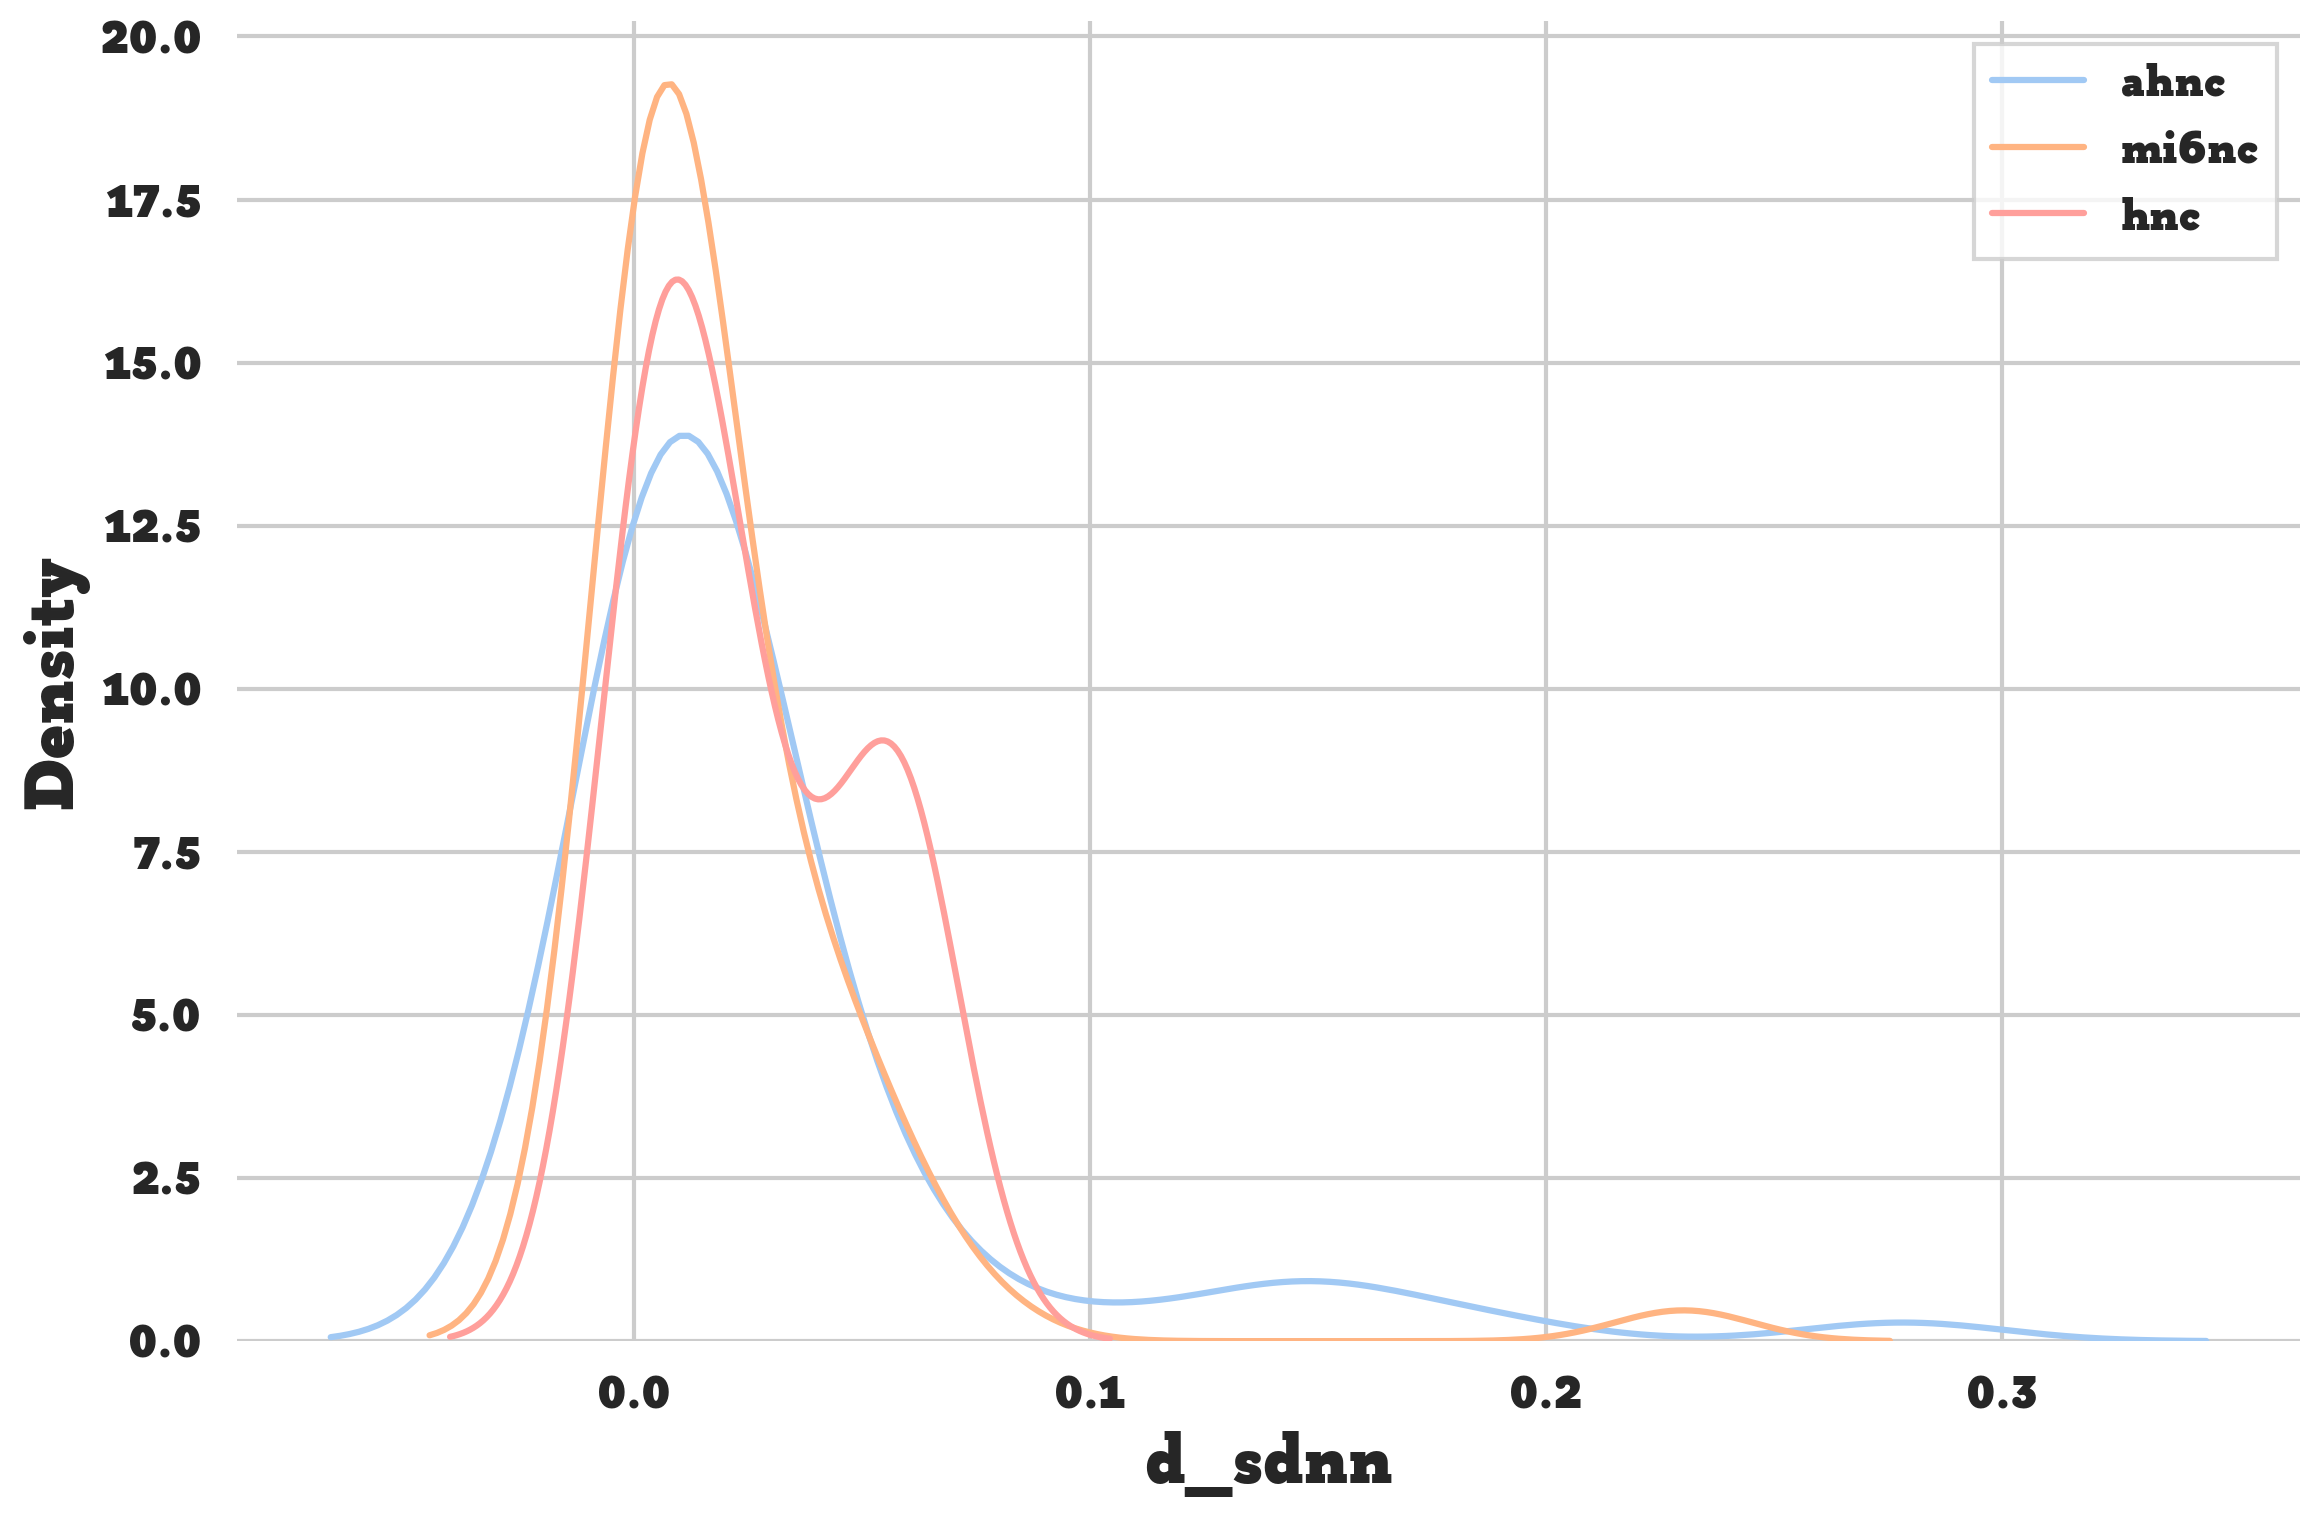

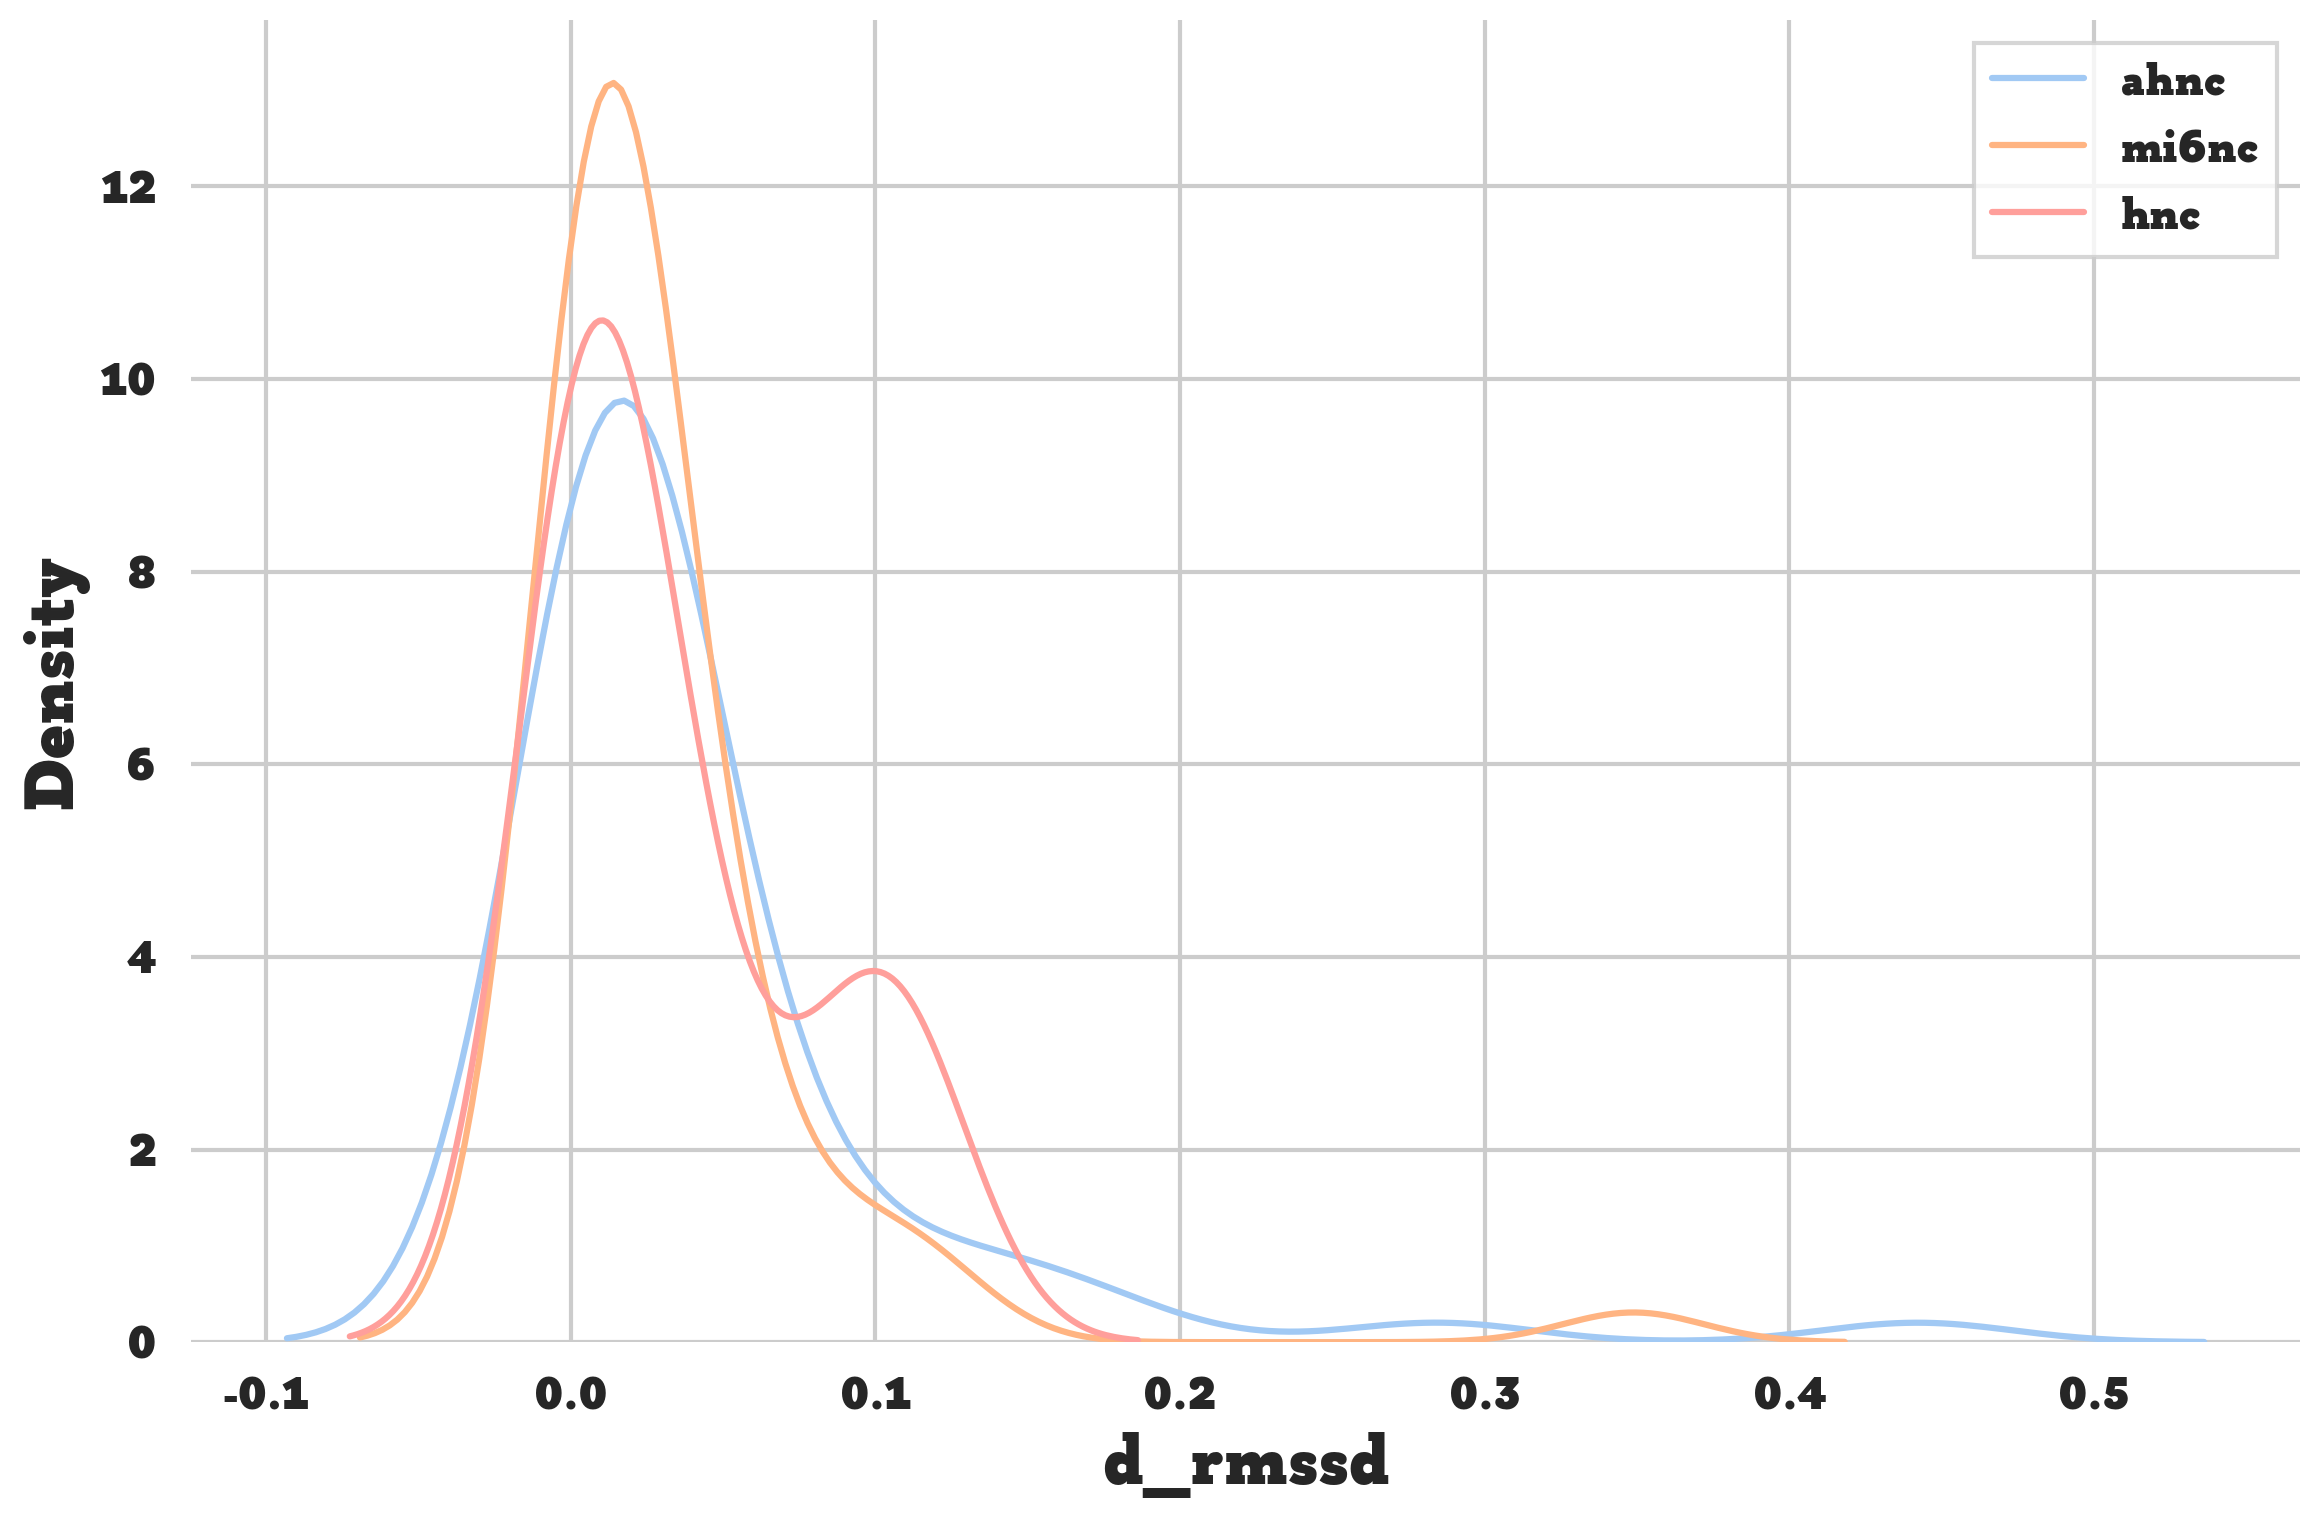

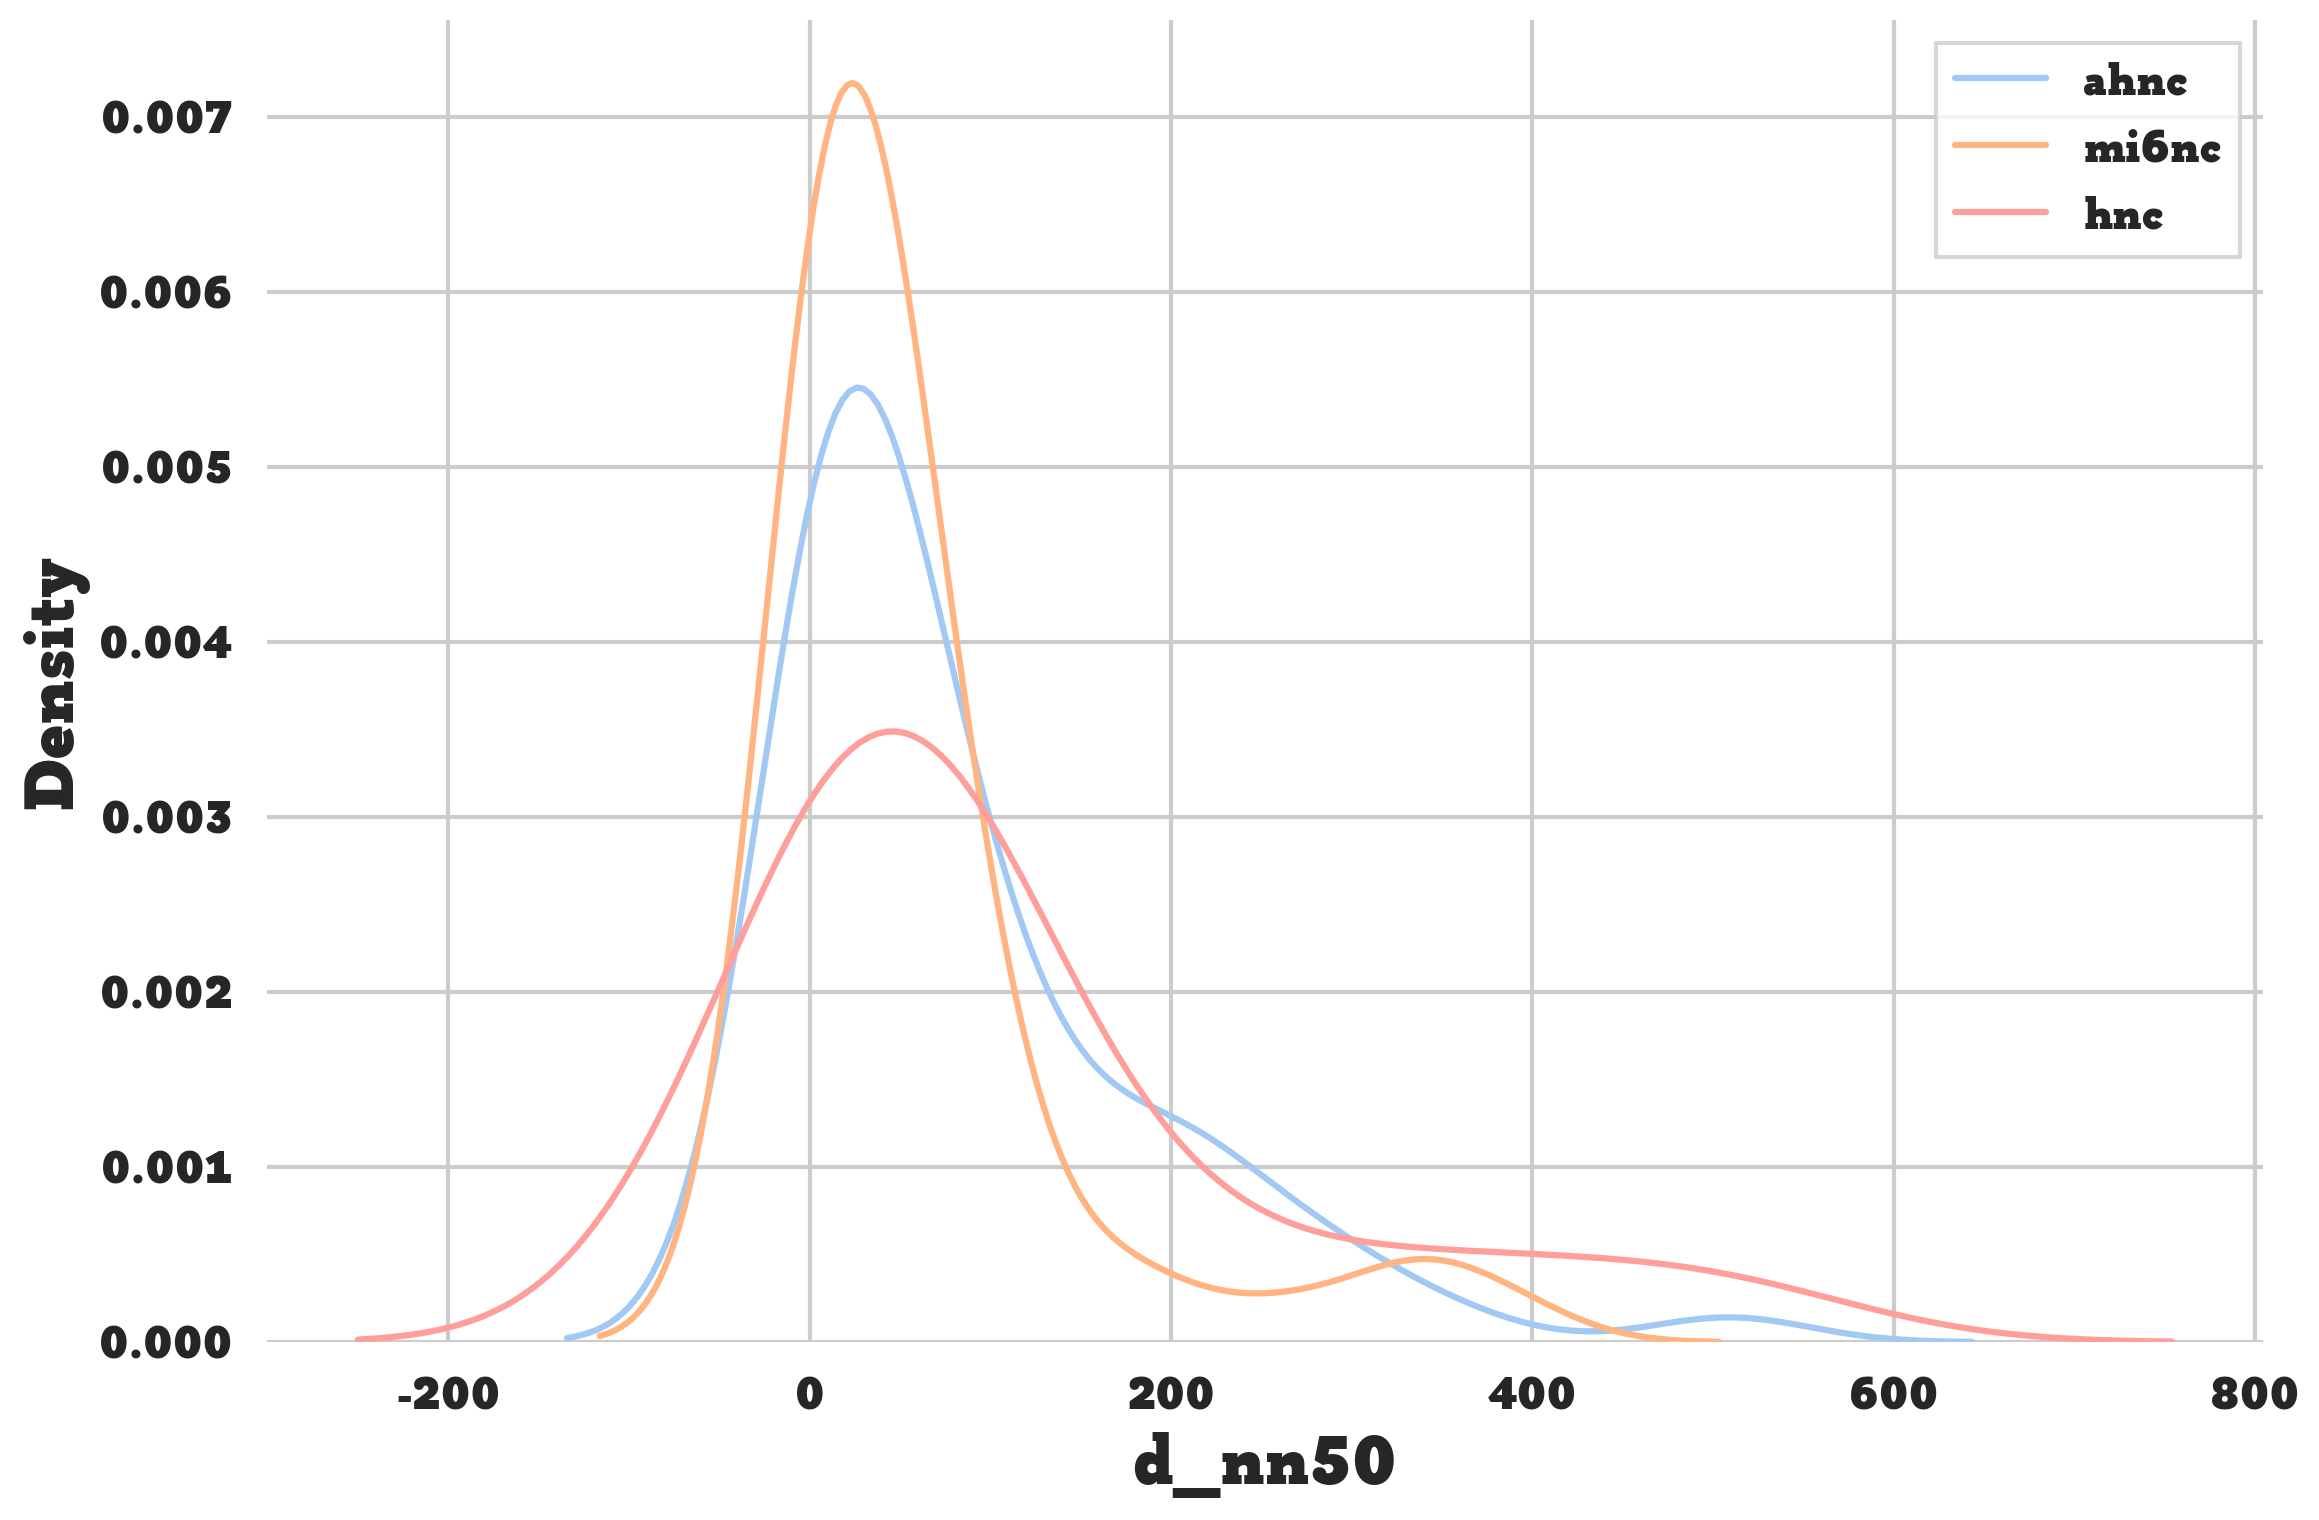

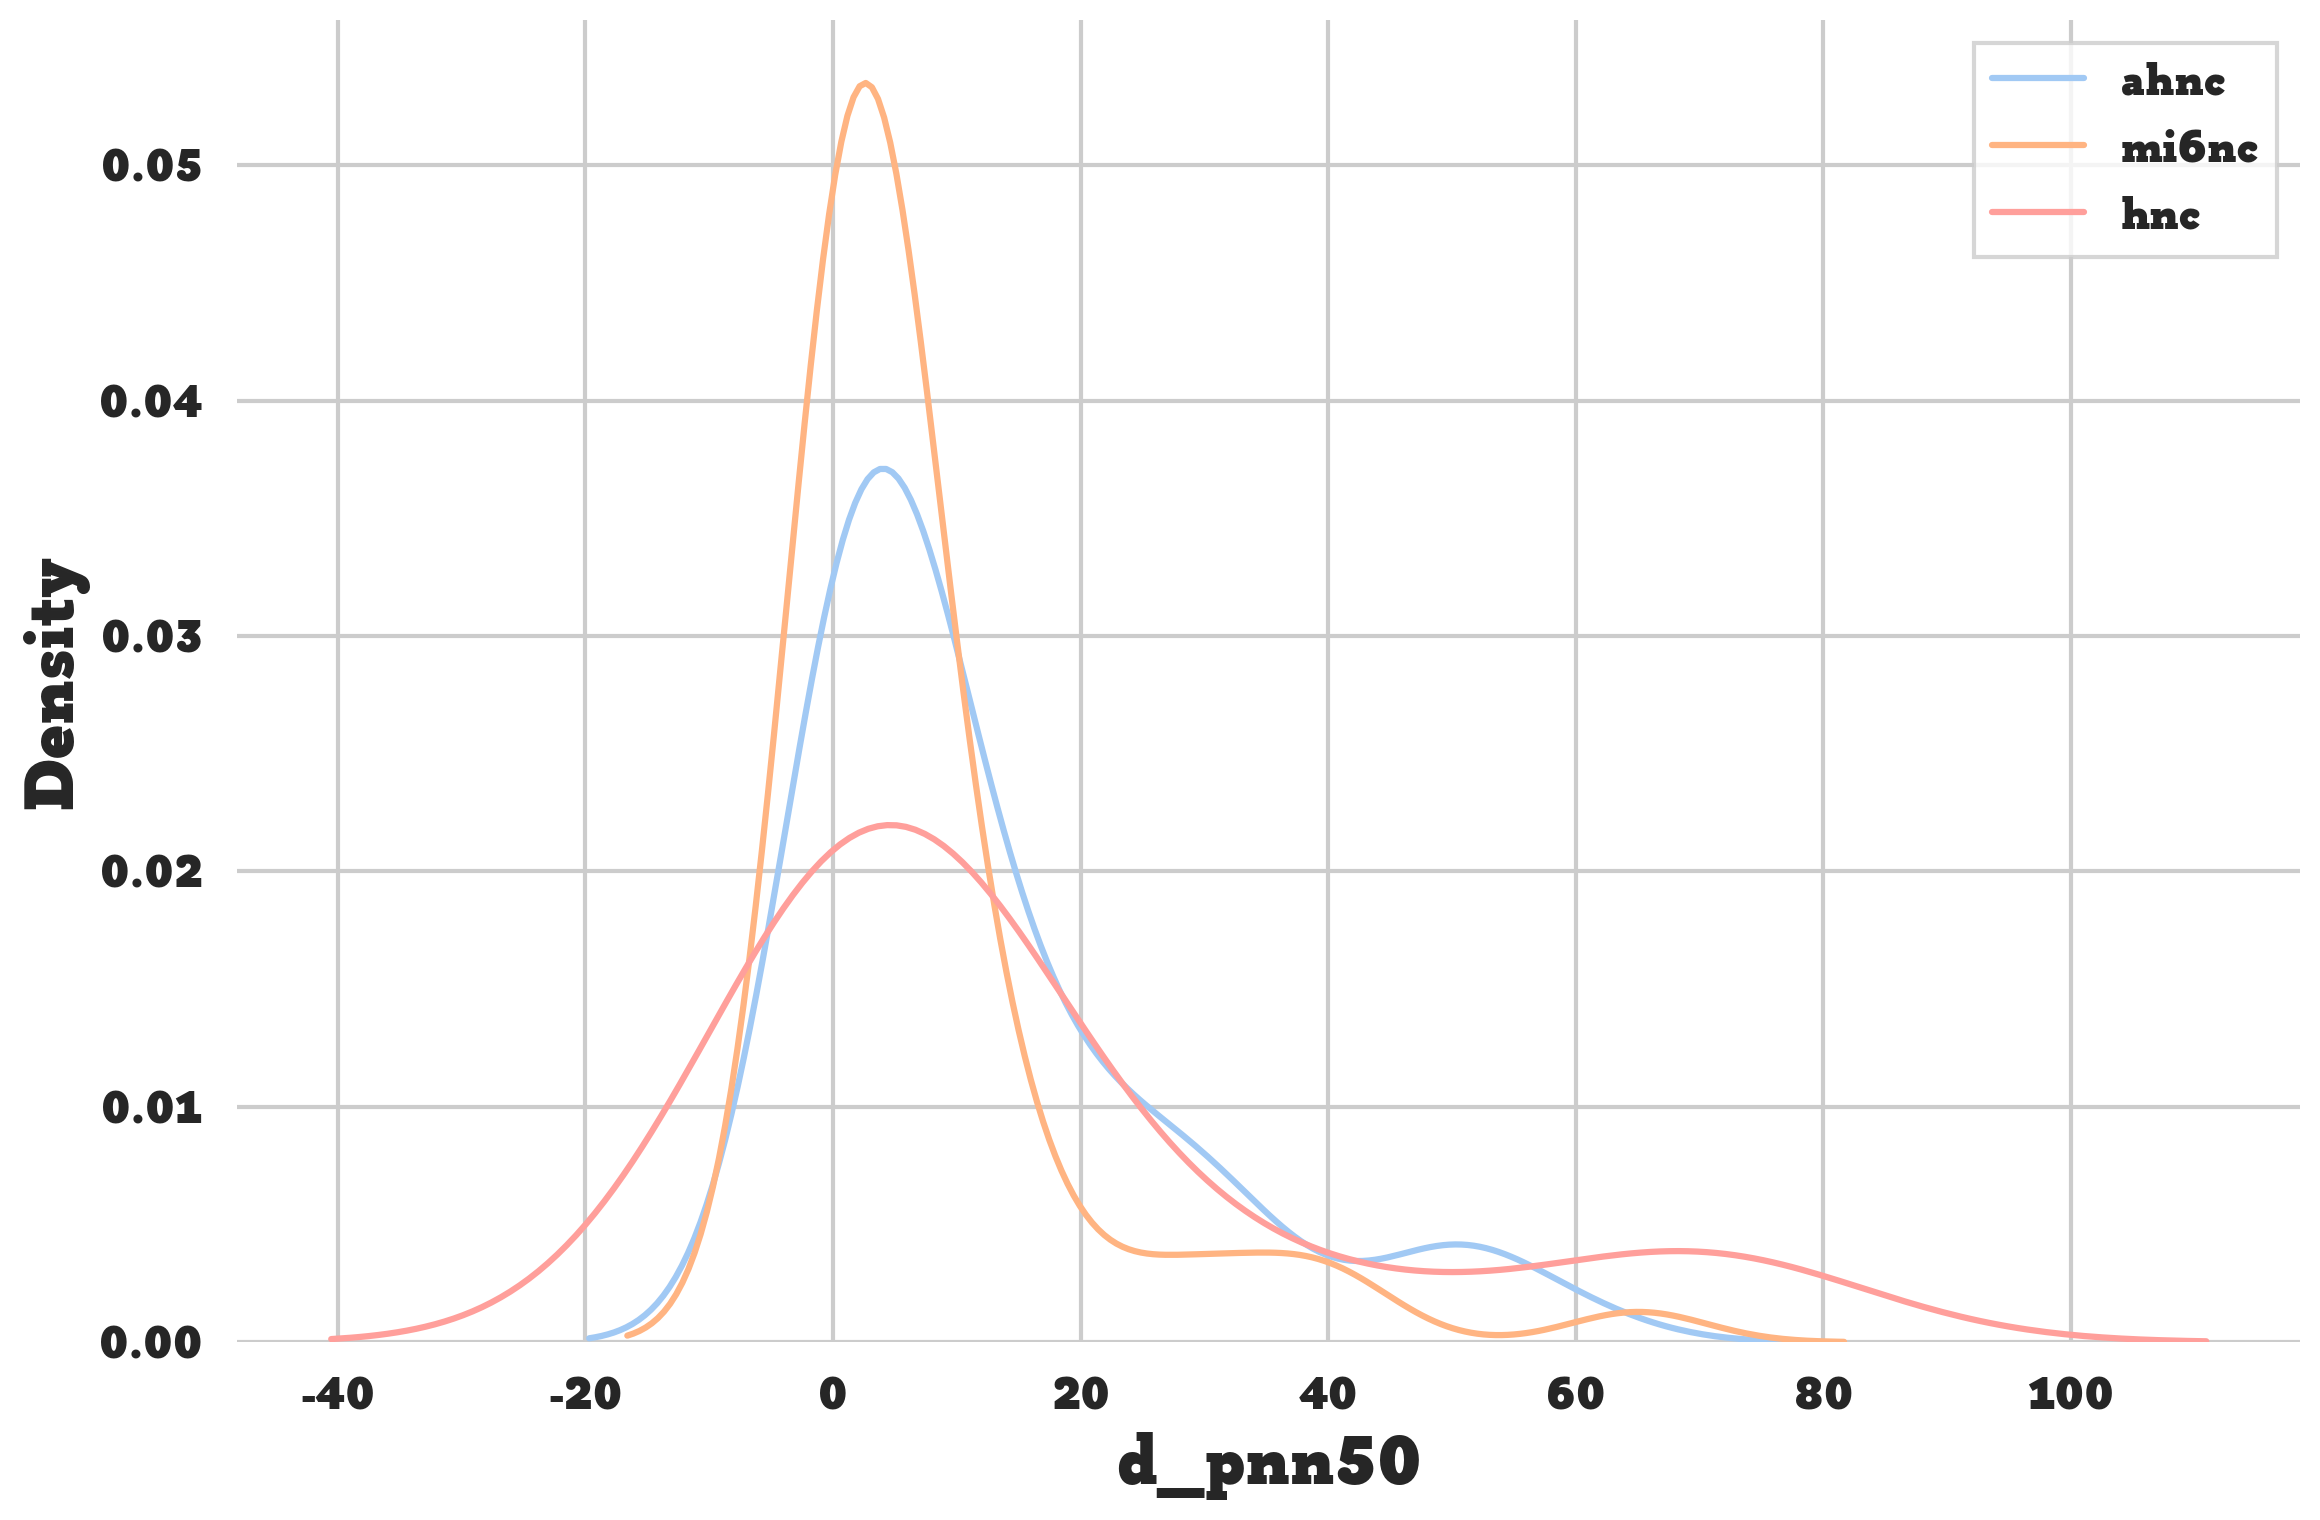

In [68]:
for i in cols:
    make_kde([ahnc, mi6nc, minc, hnc], ["ahnc", "mi6nc", "minc", "hnc"], i)